In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ddos_data = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', low_memory=False)


In [3]:
train_columns=ddos_data.columns.tolist()

In [4]:
ddos_data.shape

(225745, 85)

In [5]:
ddos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       225745 non-null  object 
 1    Source IP                    225745 non-null  object 
 2    Source Port                  225745 non-null  int64  
 3    Destination IP               225745 non-null  object 
 4    Destination Port             225745 non-null  int64  
 5    Protocol                     225745 non-null  int64  
 6    Timestamp                    225745 non-null  object 
 7    Flow Duration                225745 non-null  int64  
 8    Total Fwd Packets            225745 non-null  int64  
 9    Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets   225745 non-null  int64  
 11   Total Length of Bwd Packets  225745 non-null  int64  
 12   Fwd Packet Length Max        225745 non-nul

In [6]:
ddos_data.isnull().sum()

Flow ID              0
 Source IP           0
 Source Port         0
 Destination IP      0
 Destination Port    0
                    ..
Idle Mean            0
 Idle Std            0
 Idle Max            0
 Idle Min            0
 Label               0
Length: 85, dtype: int64

In [7]:
ddos_data.shape

(225745, 85)

In [8]:
ddos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       225745 non-null  object 
 1    Source IP                    225745 non-null  object 
 2    Source Port                  225745 non-null  int64  
 3    Destination IP               225745 non-null  object 
 4    Destination Port             225745 non-null  int64  
 5    Protocol                     225745 non-null  int64  
 6    Timestamp                    225745 non-null  object 
 7    Flow Duration                225745 non-null  int64  
 8    Total Fwd Packets            225745 non-null  int64  
 9    Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets   225745 non-null  int64  
 11   Total Length of Bwd Packets  225745 non-null  int64  
 12   Fwd Packet Length Max        225745 non-nul

In [9]:
ddos_data.isnull().sum()

Flow ID              0
 Source IP           0
 Source Port         0
 Destination IP      0
 Destination Port    0
                    ..
Idle Mean            0
 Idle Std            0
 Idle Max            0
 Idle Min            0
 Label               0
Length: 85, dtype: int64

In [10]:
ddos_data[' Label'].value_counts()


DDoS      128027
BENIGN     97718
Name:  Label, dtype: int64

In [11]:
def visualize_labels_distribution(ddos_data):
    label_counts=ddos_data[' Label'].value_counts()
    plt.figure(figsize=(3, 3))
    plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of DDoS Attack Types')
    plt.axis('equal') 
    plt.show()

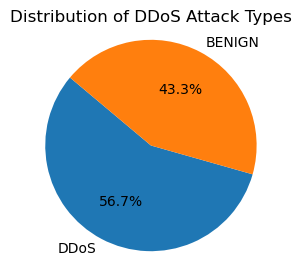

In [12]:
visualize_labels_distribution(ddos_data)

# Normalizing time stamp

In [13]:
def normalize_timestamp(ddos_data):
    ddos_data[' Timestamp'] = pd.to_datetime(ddos_data[' Timestamp'])
    ddos_data.sort_values(by=' Timestamp', inplace=True)



In [14]:
normalize_timestamp(ddos_data)


In [15]:
ddos_data[' Timestamp']

0        2017-07-07 03:30:00
1158     2017-07-07 03:30:00
1157     2017-07-07 03:30:00
1156     2017-07-07 03:30:00
1155     2017-07-07 03:30:00
                 ...        
225640   2017-07-07 05:02:00
225641   2017-07-07 05:02:00
225642   2017-07-07 05:02:00
225664   2017-07-07 05:02:00
225744   2017-07-07 05:02:00
Name:  Timestamp, Length: 225745, dtype: datetime64[ns]

# Visualize different features' variation in time:¶


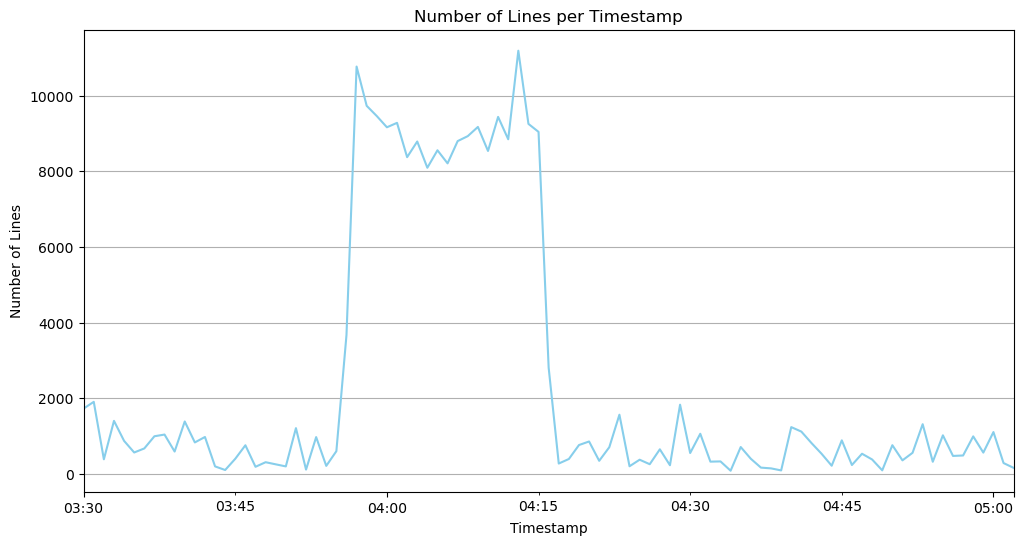

In [16]:
connection_grouped_by_time=ddos_data.groupby(' Timestamp').size()
plt.figure(figsize=(12, 6))
connection_grouped_by_time.plot(kind='line', color='skyblue')
plt.xlabel('Timestamp')
plt.ylabel('Number of Lines')
#plt.xticks(rotation=90)
plt.title('Number of Lines per Timestamp')
plt.grid(axis='y')
plt.show()

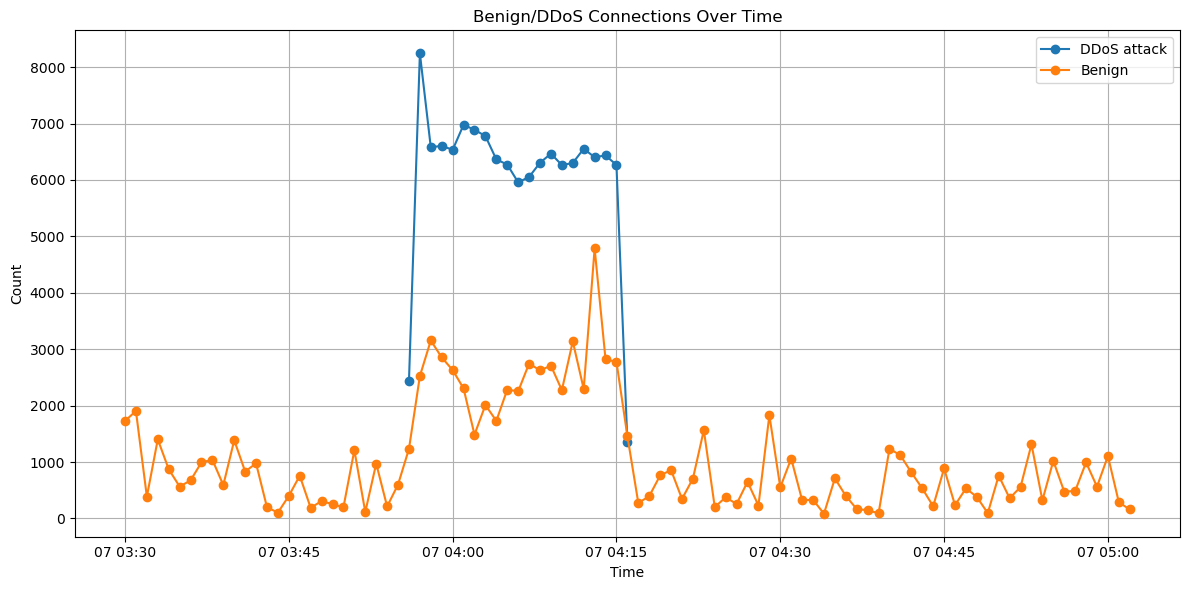

In [17]:
connection_by_time_b=ddos_data[ddos_data[' Label']=='BENIGN'].groupby(' Timestamp').size()
connection_by_time_nb=ddos_data[ddos_data[' Label']!='BENIGN'].groupby(' Timestamp').size()
plt.figure(figsize=(12, 6))
plt.plot(connection_by_time_nb.index, connection_by_time_nb.values, marker='o', linestyle='-',label='DDoS attack')
plt.plot(connection_by_time_b.index, connection_by_time_b.values, marker='o', linestyle='-', label='Benign')
plt.title('Benign/DDoS Connections Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
#plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

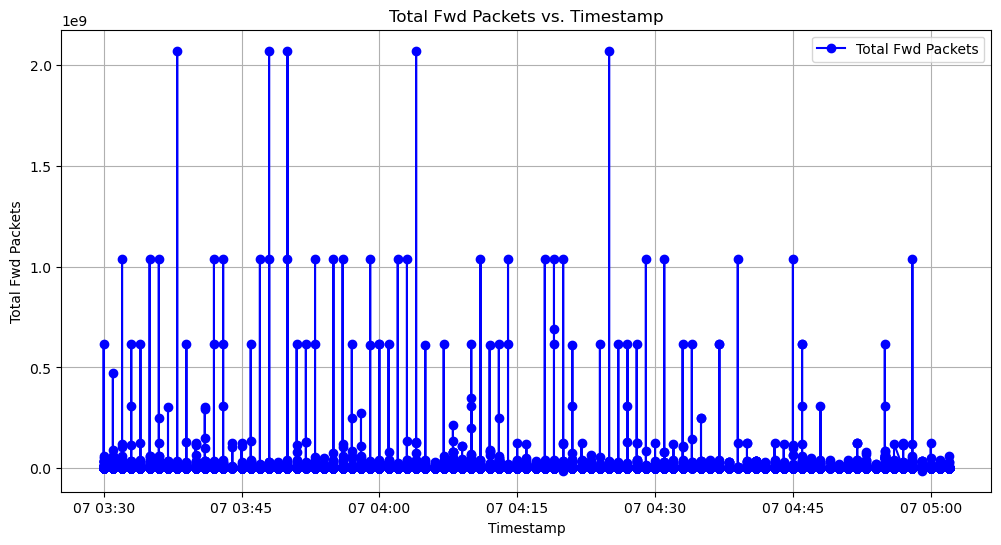

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(ddos_data[' Timestamp'], ddos_data['Flow Bytes/s'], color='blue', marker='o', linestyle='-', label='Total Fwd Packets')
plt.title('Total Fwd Packets vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Total Fwd Packets')
plt.legend()
plt.grid(True)
plt.show()


# Distribution and visualisation of different features:¶


In [19]:
categorical_features = [col for col in ddos_data.columns if ddos_data[col].dtype == 'object']
categorical_features

['Flow ID', ' Source IP', ' Destination IP', ' Label']

In [20]:
binary_columns=ddos_data.columns[ddos_data.nunique()==2].tolist()
binary_columns


['Fwd PSH Flags',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' PSH Flag Count',
 ' ACK Flag Count',
 ' URG Flag Count',
 ' ECE Flag Count',
 ' Label']

# Distribtuion of binary features by Label:¶

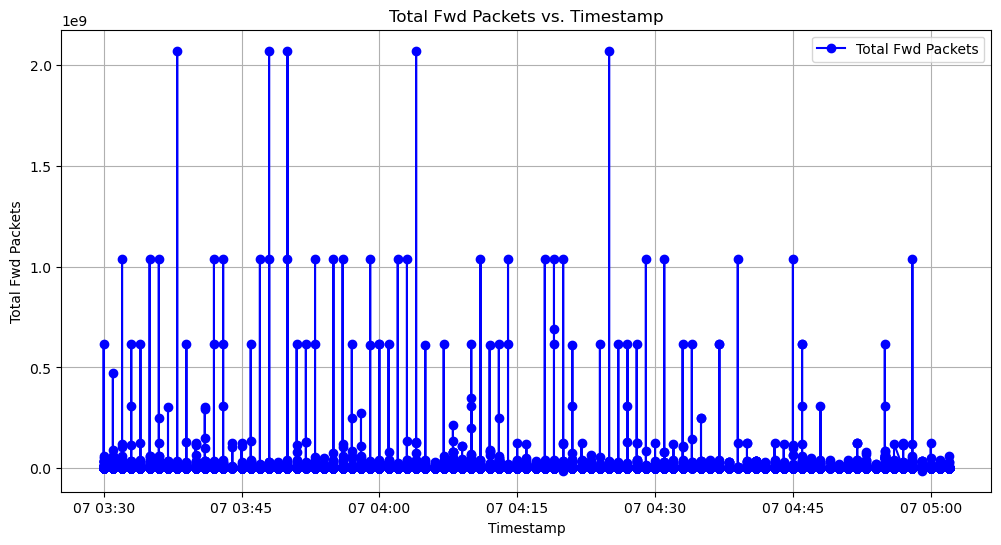

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(ddos_data[' Timestamp'], ddos_data['Flow Bytes/s'], color='blue', marker='o', linestyle='-', label='Total Fwd Packets')
plt.title('Total Fwd Packets vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Total Fwd Packets')
plt.legend()
plt.grid(True)
plt.show()

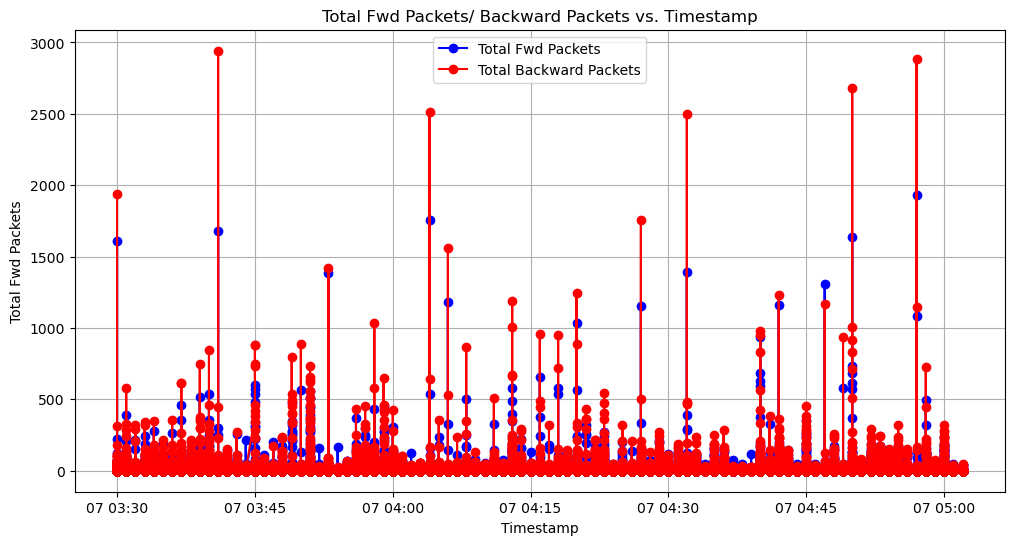

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(ddos_data[' Timestamp'], ddos_data[' Total Fwd Packets'], color='blue', marker='o', linestyle='-', label='Total Fwd Packets')
plt.plot(ddos_data[' Timestamp'], ddos_data[' Total Backward Packets'], color='red', marker='o', linestyle='-', label='Total Backward Packets')
plt.title('Total Fwd Packets/ Backward Packets vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Total Fwd Packets')
plt.legend()
plt.grid(True)
plt.show()

# Distribution and visualisation of different features:¶

In [23]:
categorical_features = [col for col in ddos_data.columns if ddos_data[col].dtype == 'object']
categorical_features

['Flow ID', ' Source IP', ' Destination IP', ' Label']

In [24]:
binary_columns=ddos_data.columns[ddos_data.nunique()==2].tolist()
binary_columns


['Fwd PSH Flags',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' PSH Flag Count',
 ' ACK Flag Count',
 ' URG Flag Count',
 ' ECE Flag Count',
 ' Label']

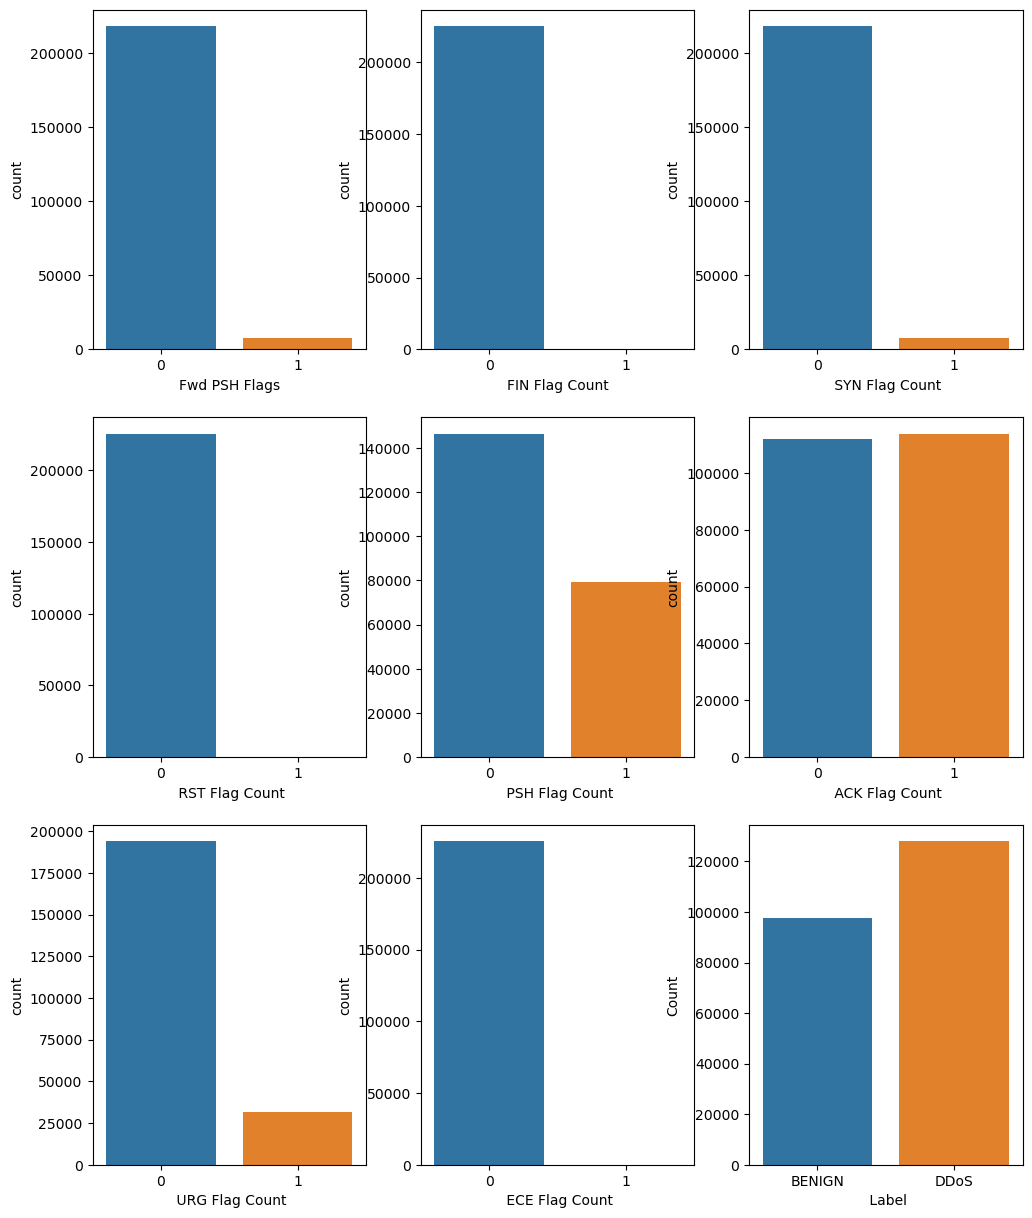

In [25]:
fig, ax = plt.subplots(3, 3, figsize=(12, 15))
ax = ax.flatten()
for i, column in enumerate(binary_columns):
    sns.countplot(data=ddos_data, x=column, ax=ax[i])
    #plt.title(f'Distribution of {column} by Label')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

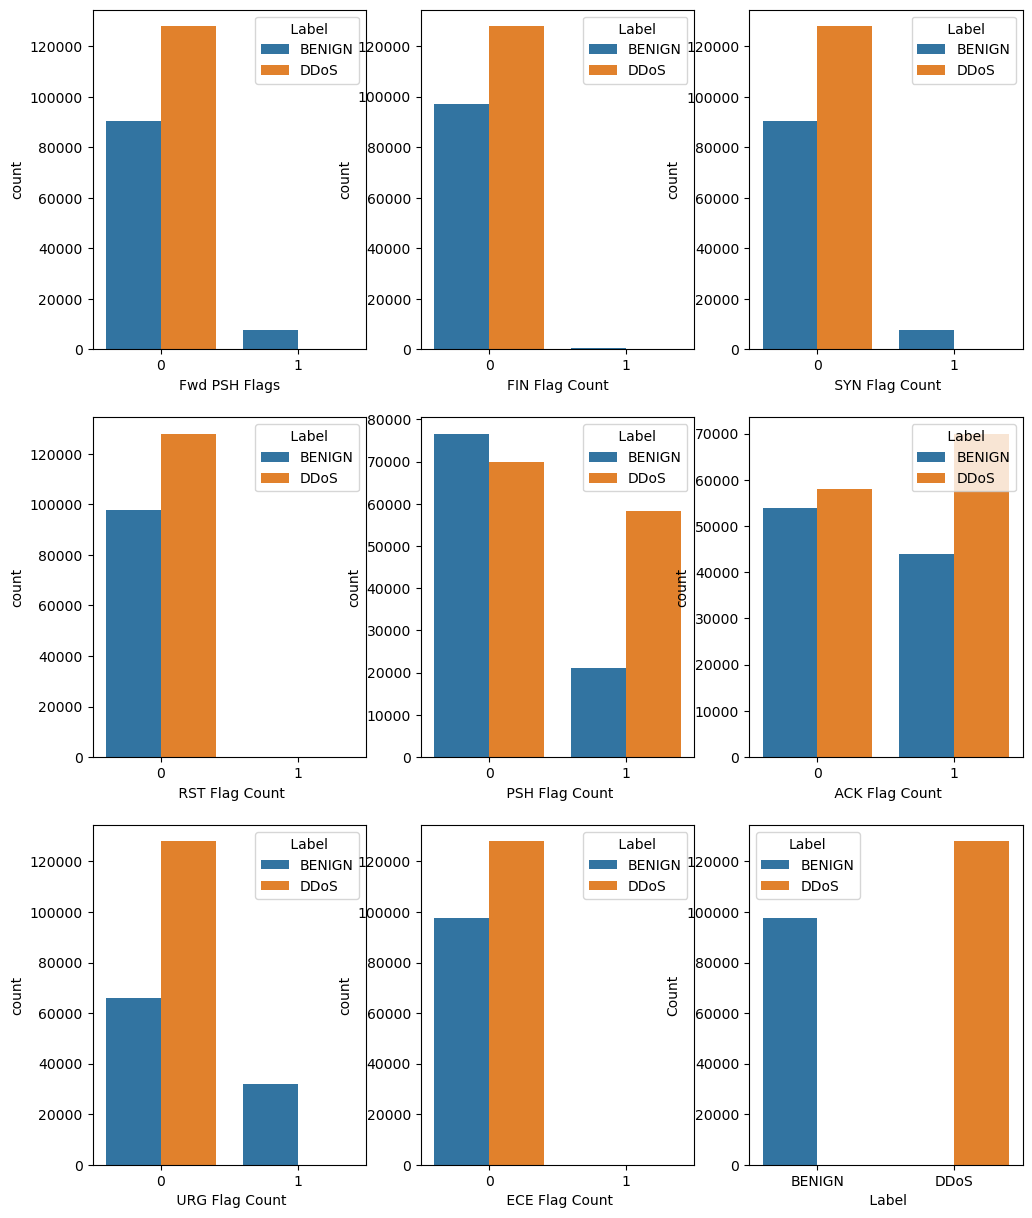

In [26]:
fig, ax = plt.subplots(3, 3, figsize=(12, 15))
ax = ax.flatten()
for i, column in enumerate(binary_columns):
    sns.countplot(data=ddos_data, x=column, hue=' Label',ax=ax[i])
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Label')
plt.show()

In [27]:
ddos_data.nunique()

Flow ID              86421
 Source IP            2067
 Source Port         50697
 Destination IP       2554
 Destination Port    23950
                     ...  
Idle Mean            35285
 Idle Std             5857
 Idle Max            33002
 Idle Min            48018
 Label                   2
Length: 85, dtype: int64

In [28]:
ddos_data[' Protocol'].value_counts()


6     192820
17     32871
0         54
Name:  Protocol, dtype: int64

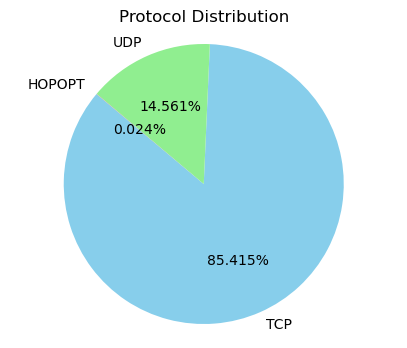

In [29]:
protocol_counts=ddos_data[' Protocol'].value_counts()
protocol_names={
    6: 'TCP', 17: 'UDP', 0: 'HOPOPT'
}
protocol_counts.index = protocol_counts.index.map(protocol_names)
plt.figure(figsize=(5, 4))
protocol_counts.plot(kind='pie', autopct='%1.3f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Protocol Distribution')
plt.ylabel('')
plt.axis('equal')
plt.show()


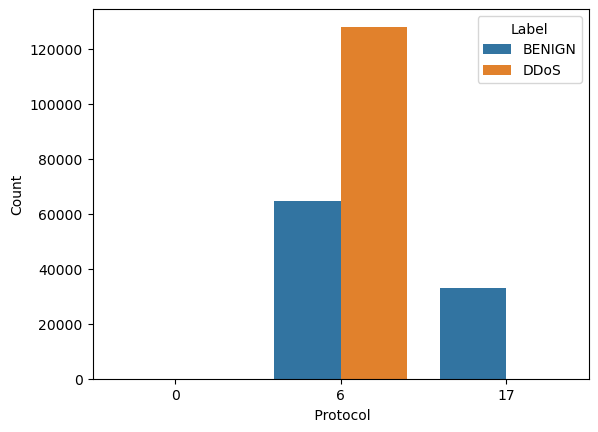

In [30]:
sns.countplot(data=ddos_data, x=' Protocol', hue=' Label')
plt.xlabel(' Protocol')
plt.ylabel('Count')
plt.legend(title='Label')


In [31]:
discrete_vars_non_binary = [col for col in ddos_data.columns if ddos_data[col].dtype == 'int64' and col not in binary_columns]
continuous_vars = [col for col in ddos_data.columns if ddos_data[col].dtype == 'float64']

In [32]:
def viz_variable(variable):
    non_benign_data = ddos_data[ddos_data[' Label'] != 'BENIGN']
    non_benign_bytes_by_time = non_benign_data.groupby([' Timestamp', variable]).size().reset_index(name='count')
    non_benign_bytes_by_time = non_benign_bytes_by_time.groupby(' Timestamp')[variable].mean()

    benign_data = ddos_data[ddos_data[' Label'] == 'BENIGN']

    benign_bytes_by_time =benign_data.groupby([' Timestamp', variable]).size().reset_index(name='count')
    benign_bytes_by_time = benign_bytes_by_time.groupby(' Timestamp')[variable].mean()

    plt.figure(figsize=(12, 6))
    plt.plot(non_benign_bytes_by_time.index, non_benign_bytes_by_time.values, label='Non-Benign', linestyle='-', marker='o')
    plt.plot(benign_bytes_by_time.index, benign_bytes_by_time.values, label='Benign', linestyle='-', marker='o')
    plt.title('Average '+variable+ ' Received Over Time for non benign connections')
    plt.xlabel('Time')
    plt.ylabel('Average Bytes')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [33]:
discrete_vars_non_binary

[' Source Port',
 ' Destination Port',
 ' Protocol',
 ' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 ' Fwd Header Length',
 ' Bwd Header Length',
 ' Min Packet Length',
 ' Max Packet Length',
 ' CWE Flag Count',
 ' Down/Up Ratio',
 ' Fwd Header Length.1',
 'Fwd Avg Bytes/Bulk',
 ' Fwd Avg Packets/Bulk',
 ' Fwd Avg Bulk Rate',
 ' Bwd Avg Bytes/Bulk',
 ' Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate',
 'Subflow Fwd Packets',
 ' Subflow Fwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Bwd Bytes',
 'Init_Win_bytes_forward',
 ' Init_Win_bytes_backward',
 ' act_data_pkt_fwd',
 ' min_seg_size_forward',
 ' Active

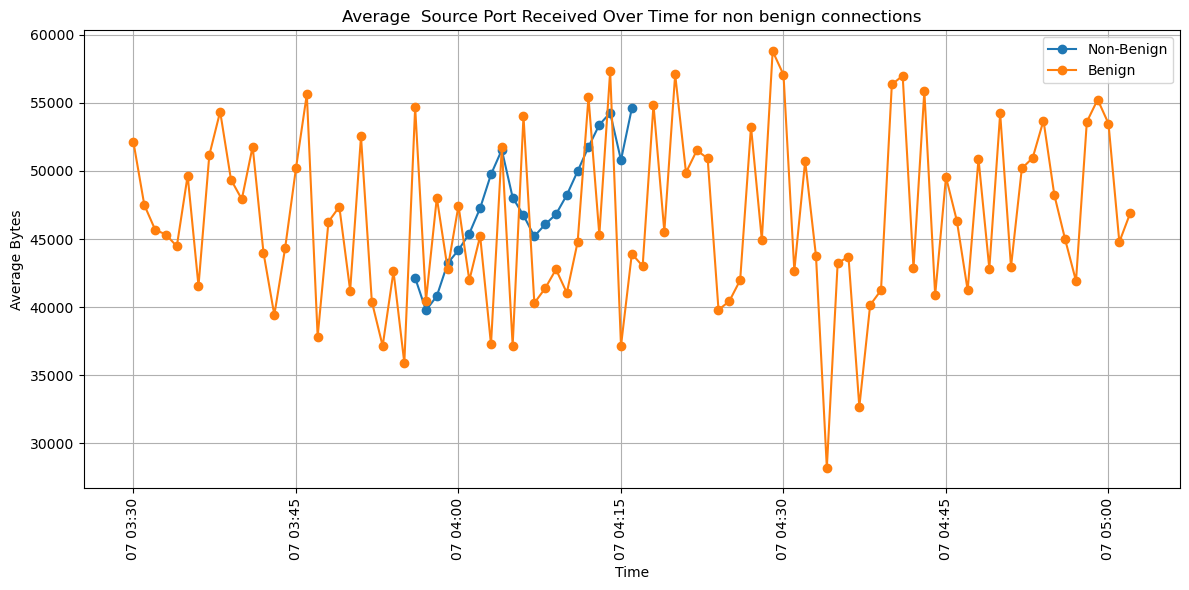

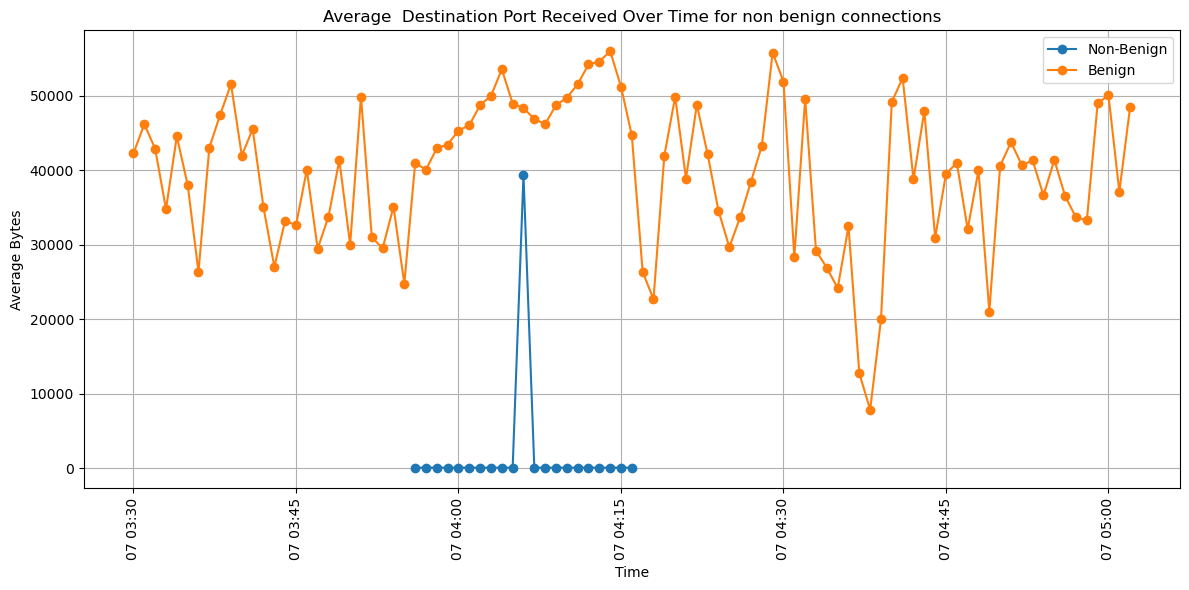

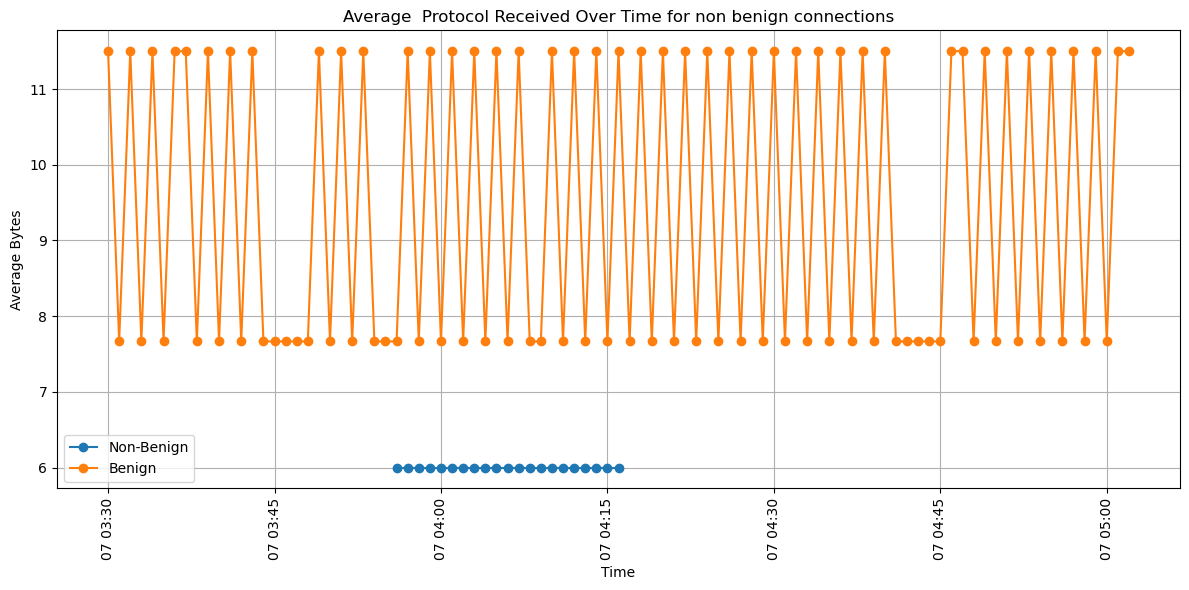

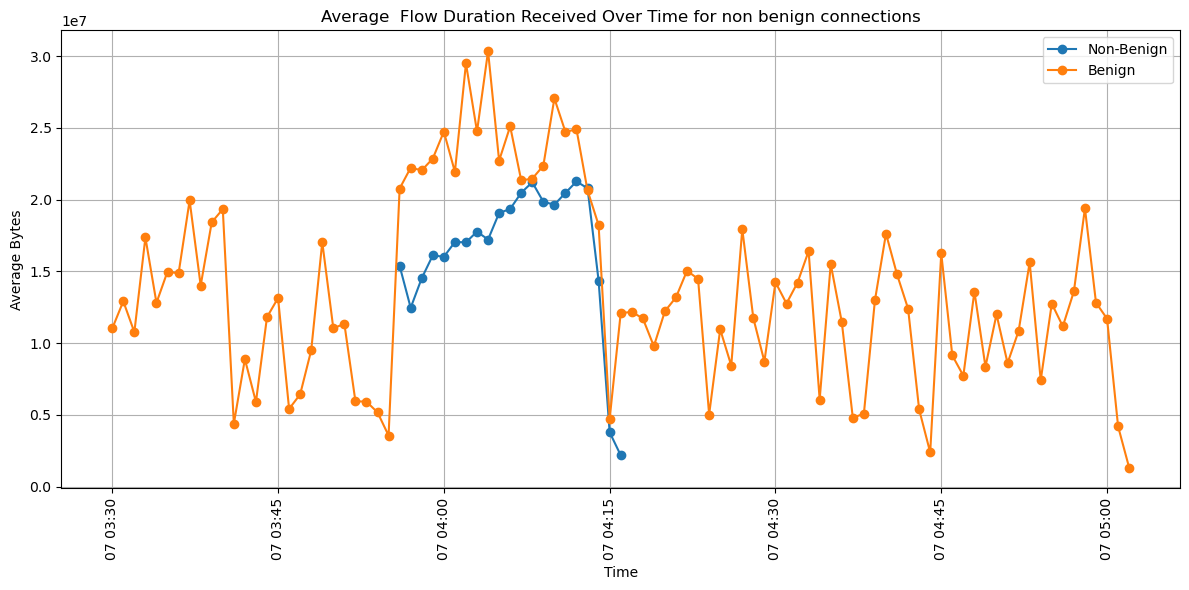

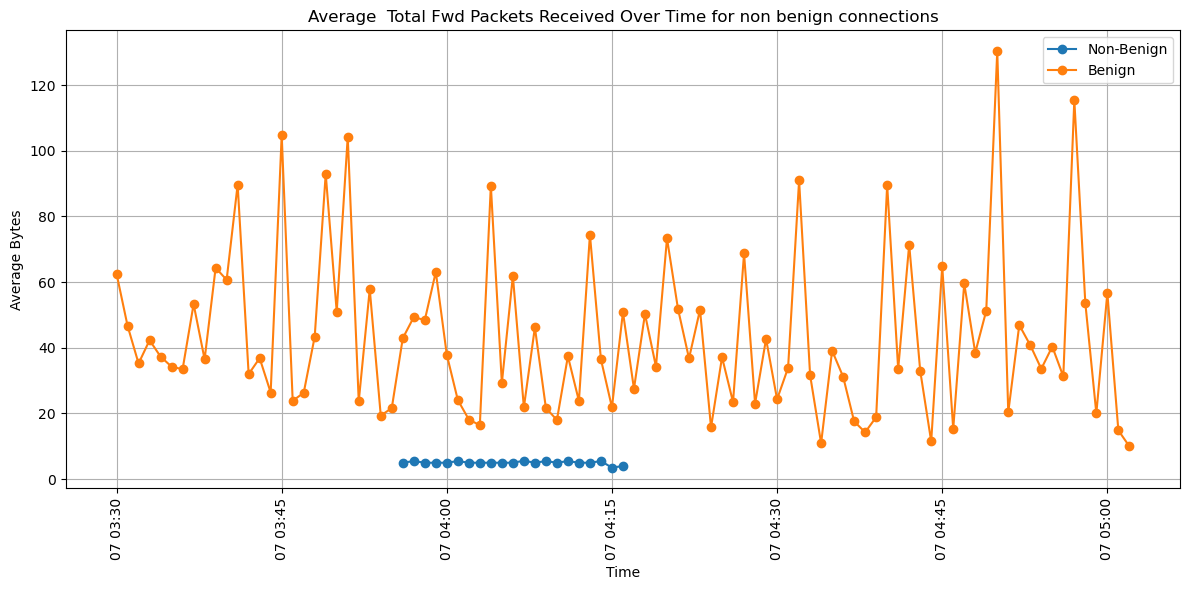

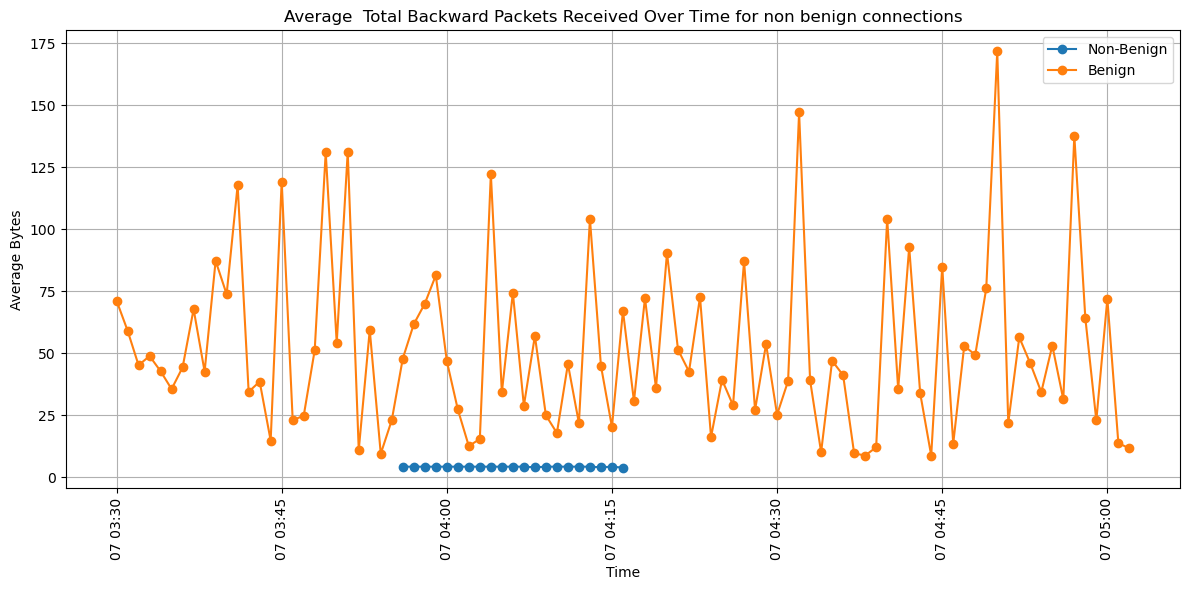

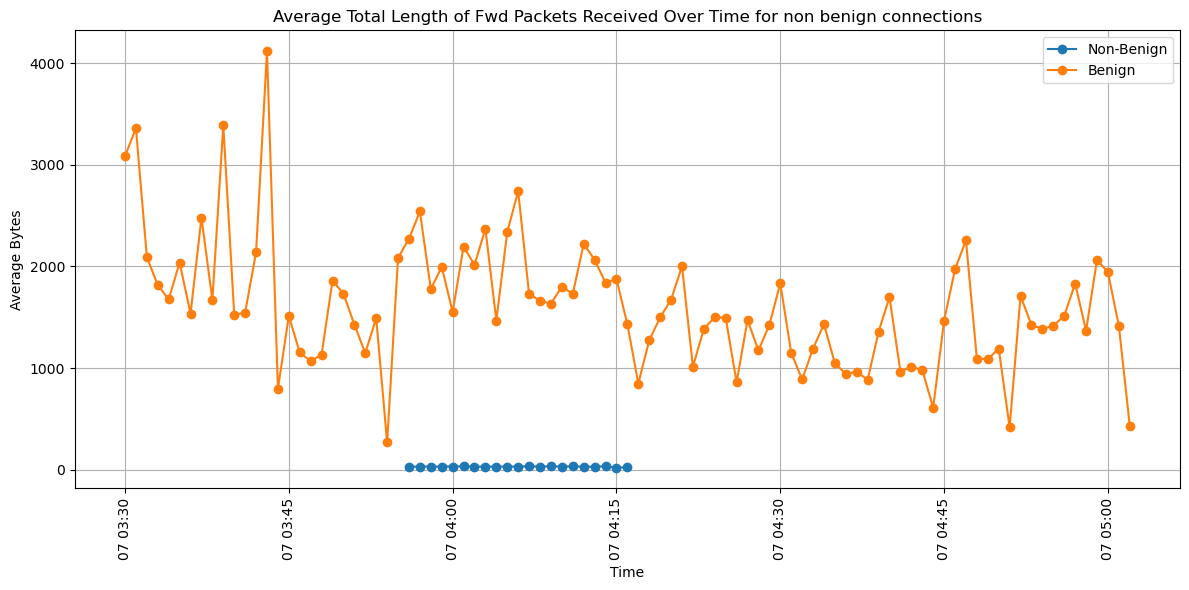

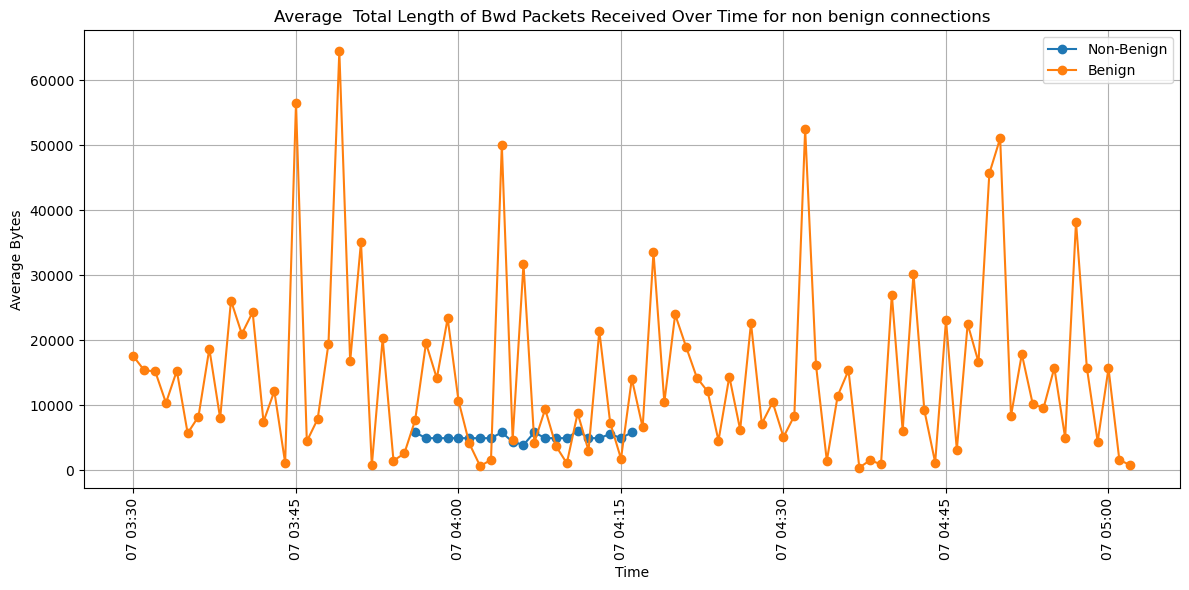

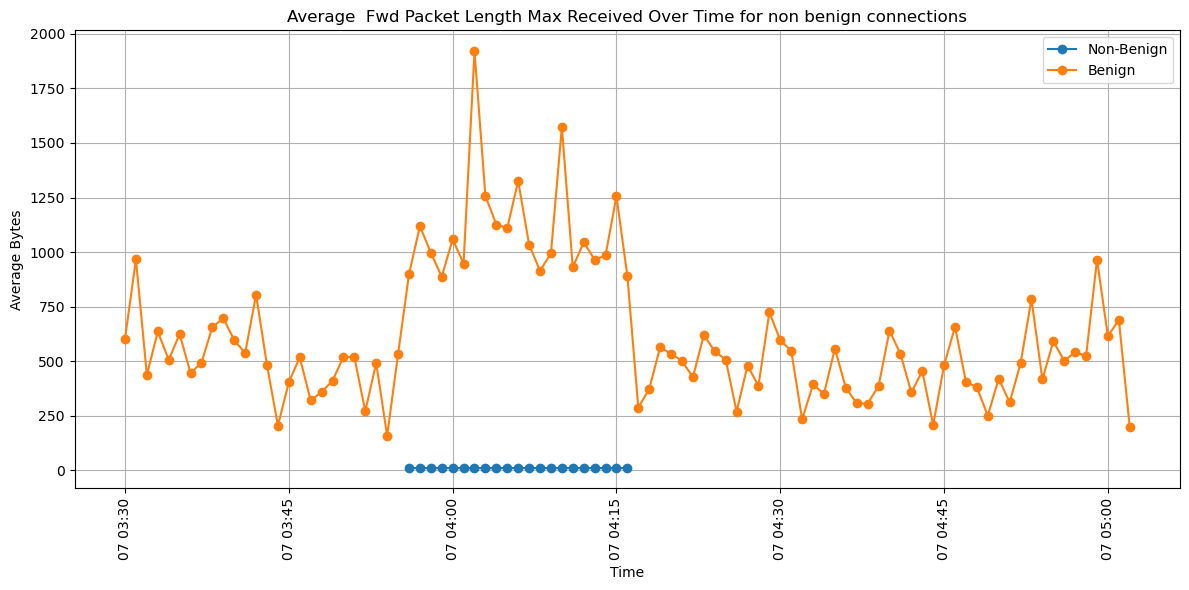

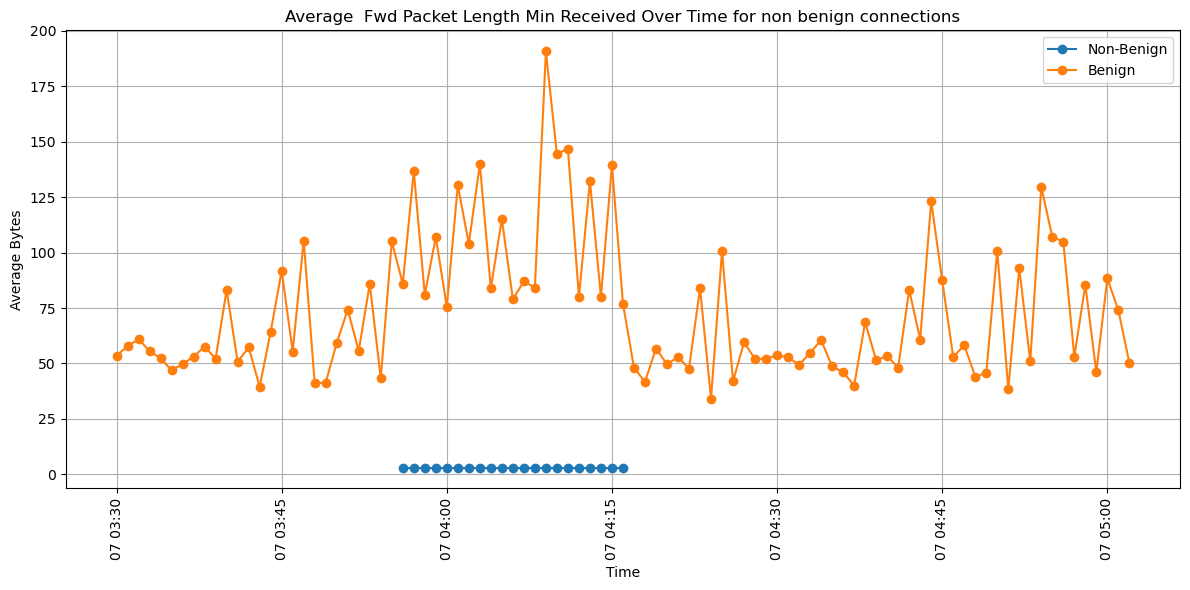

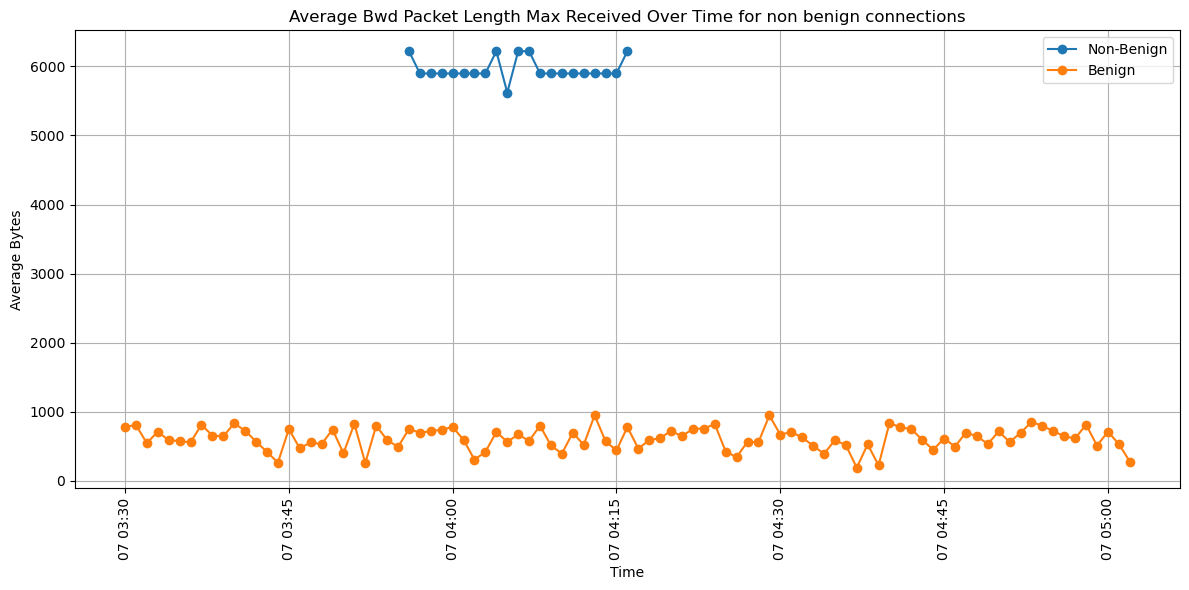

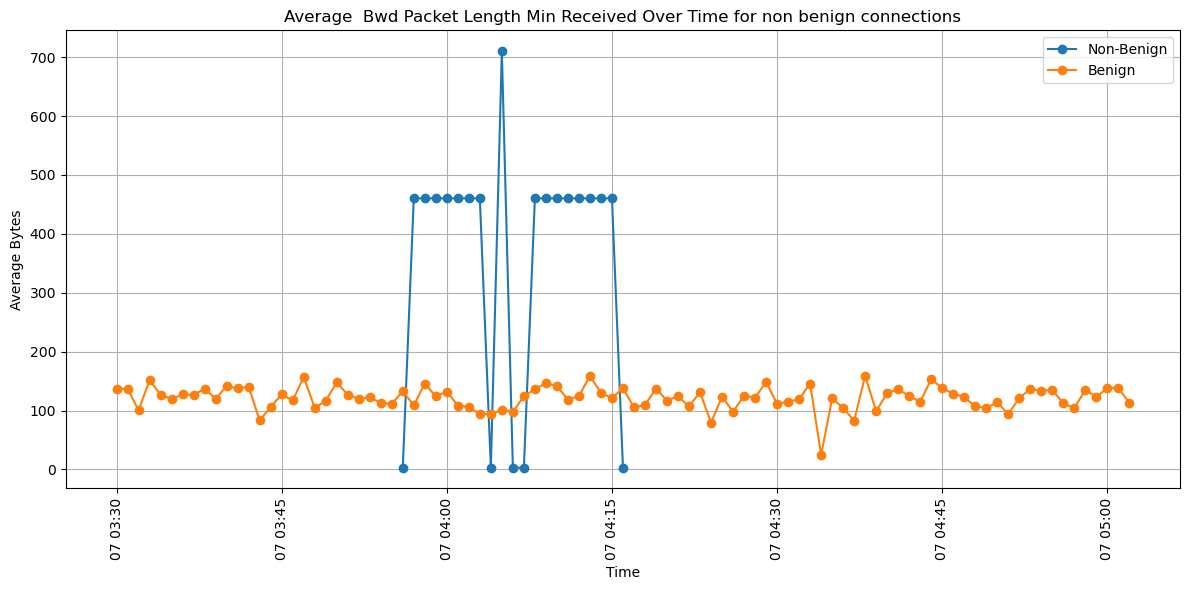

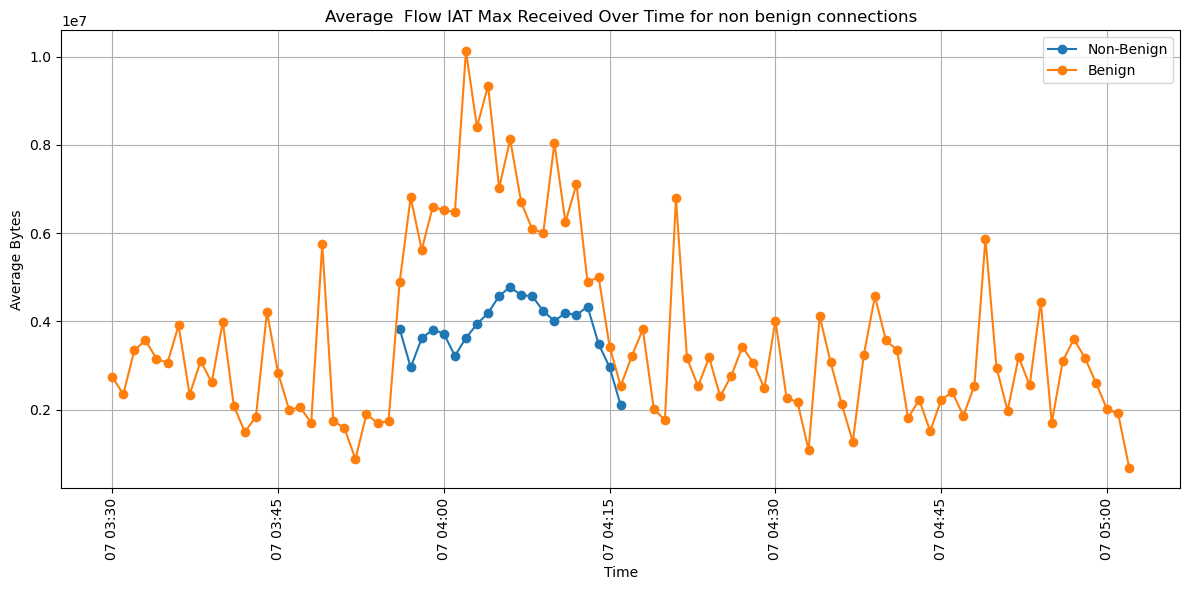

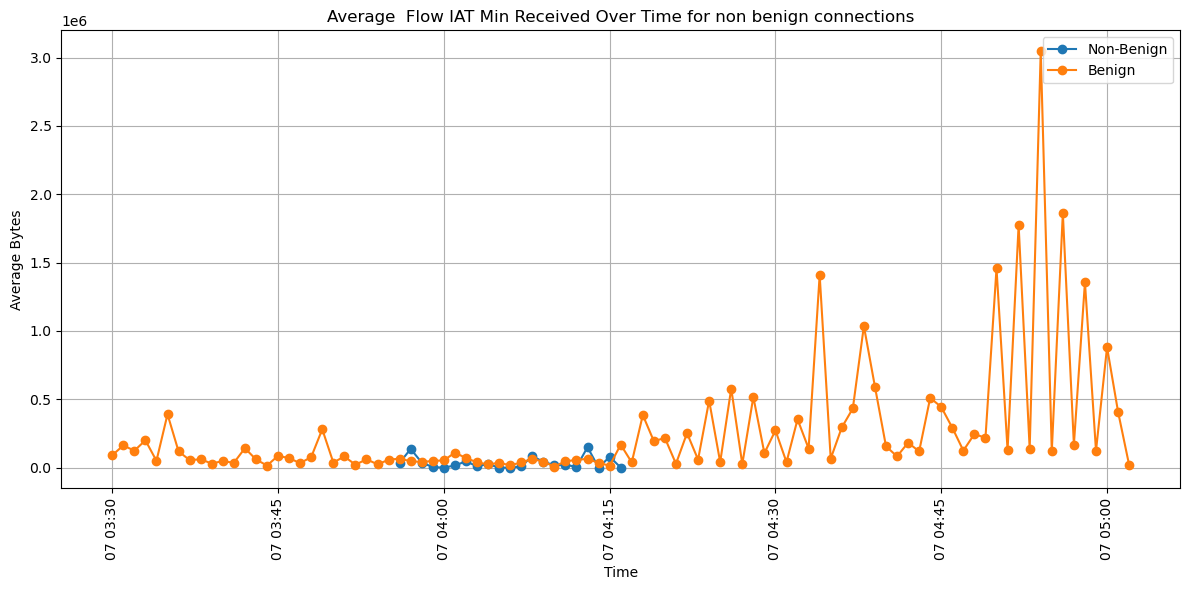

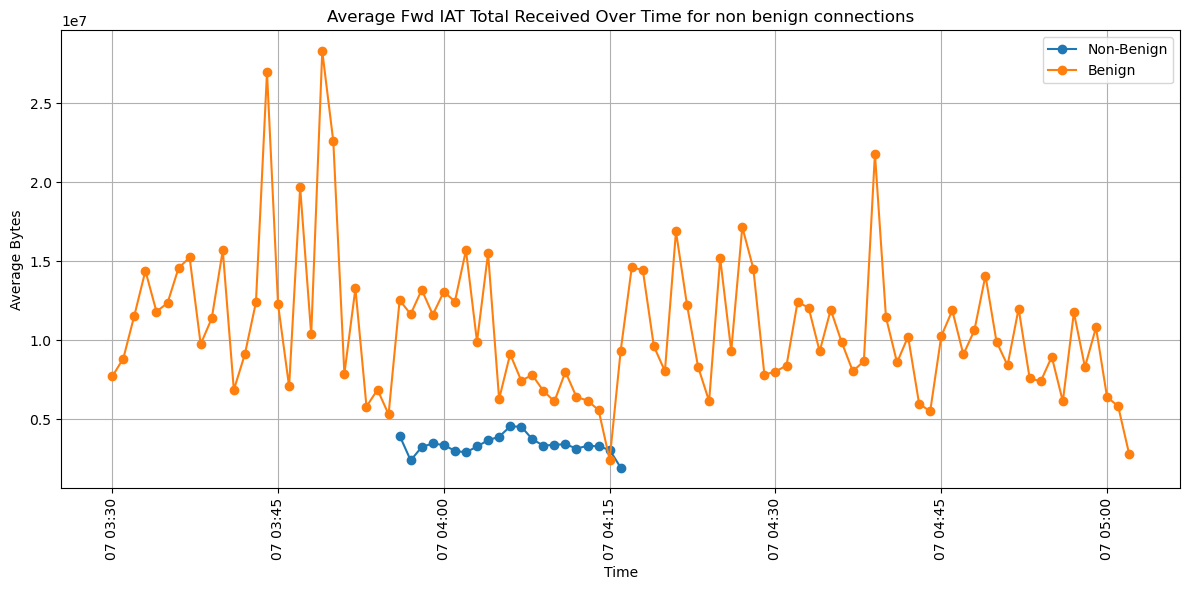

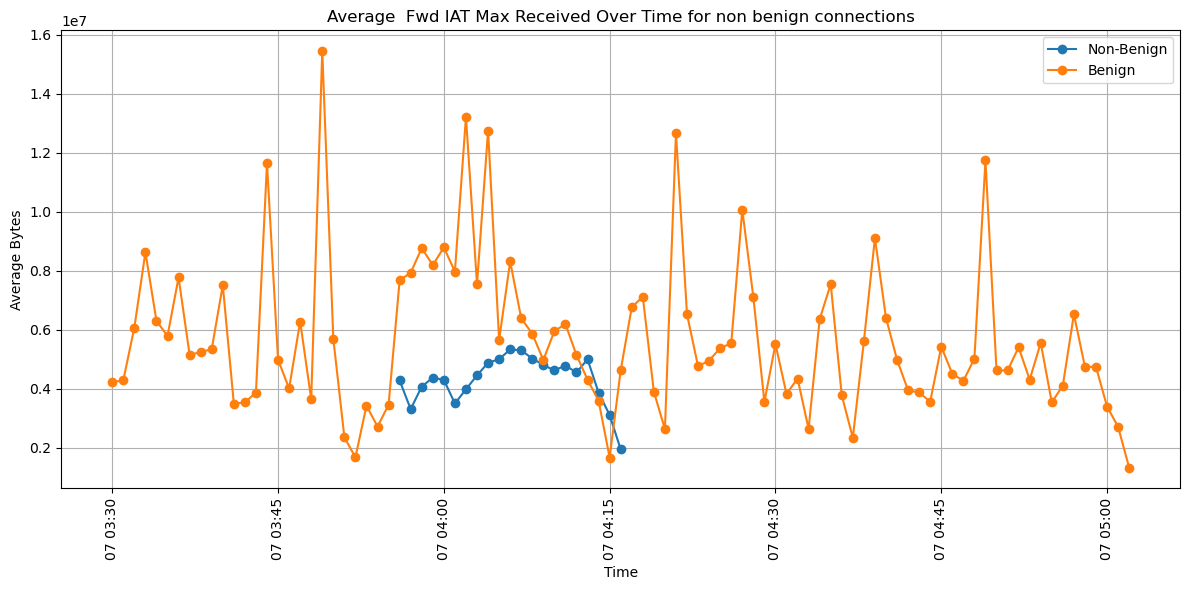

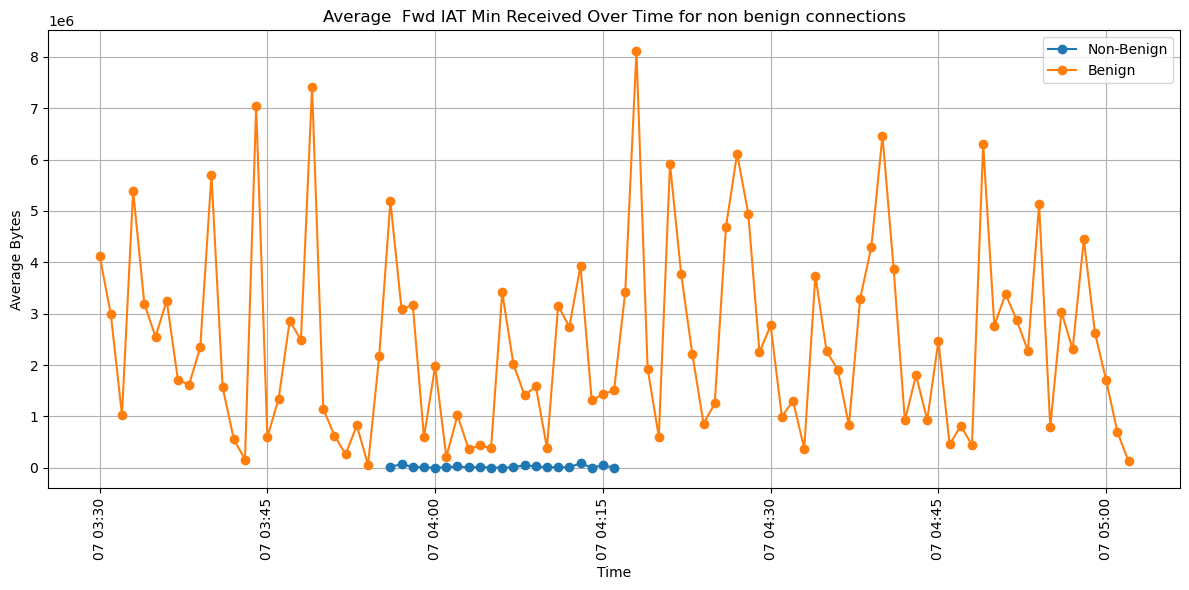

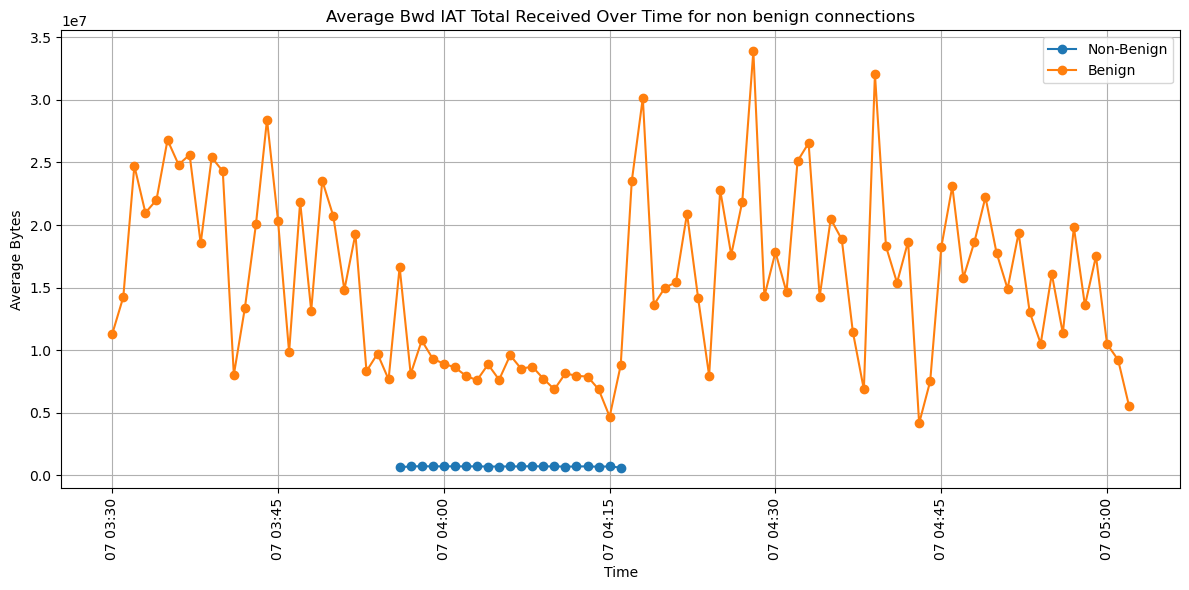

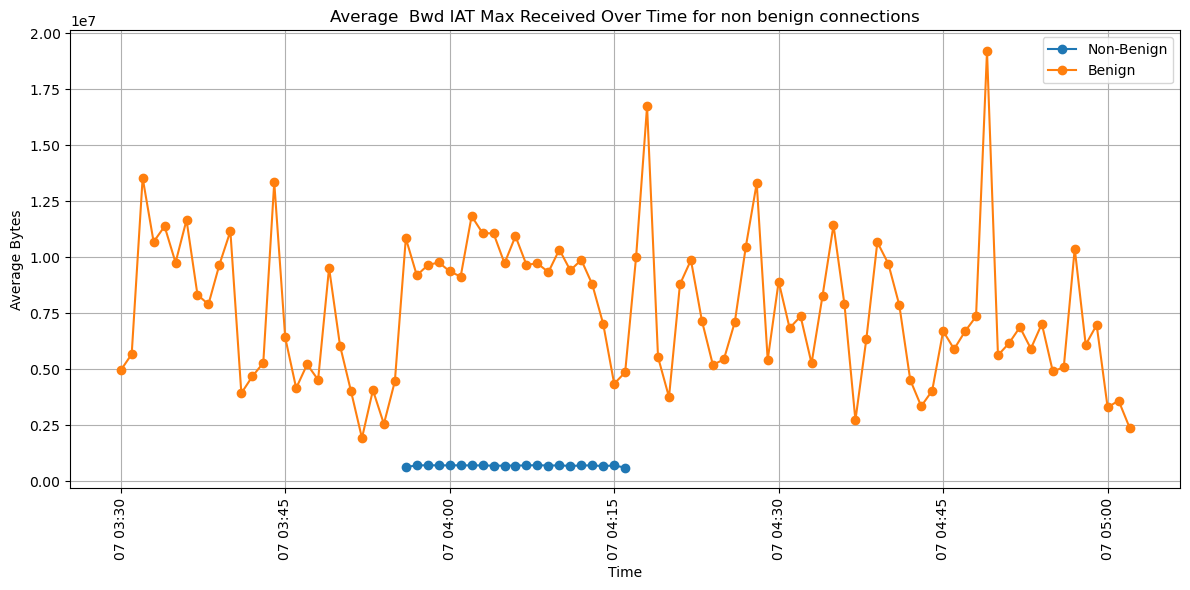

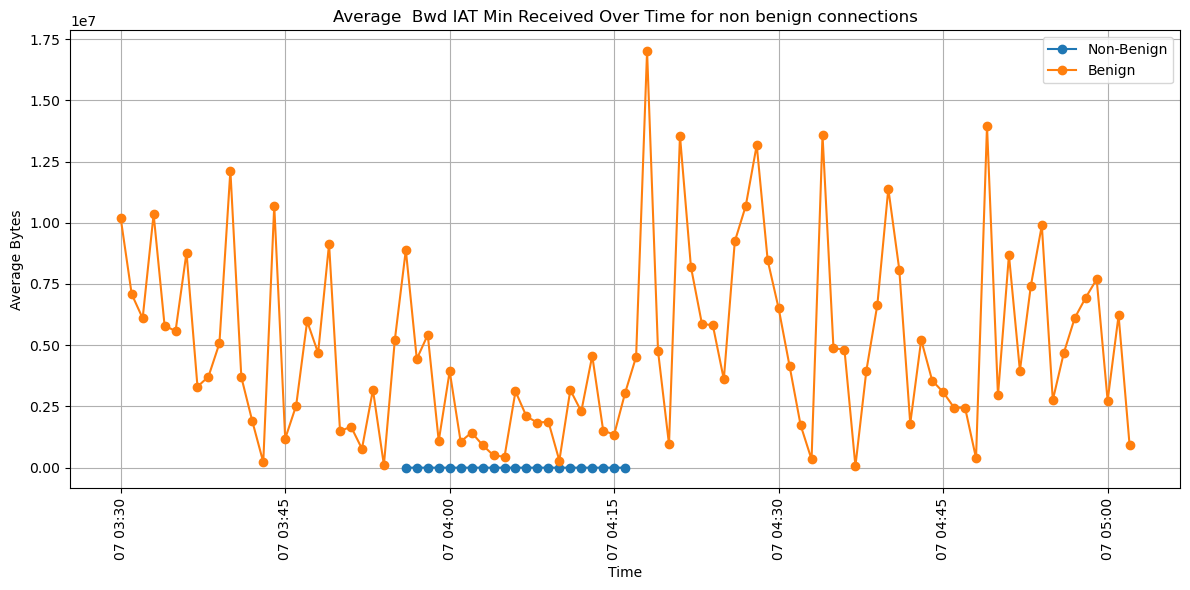

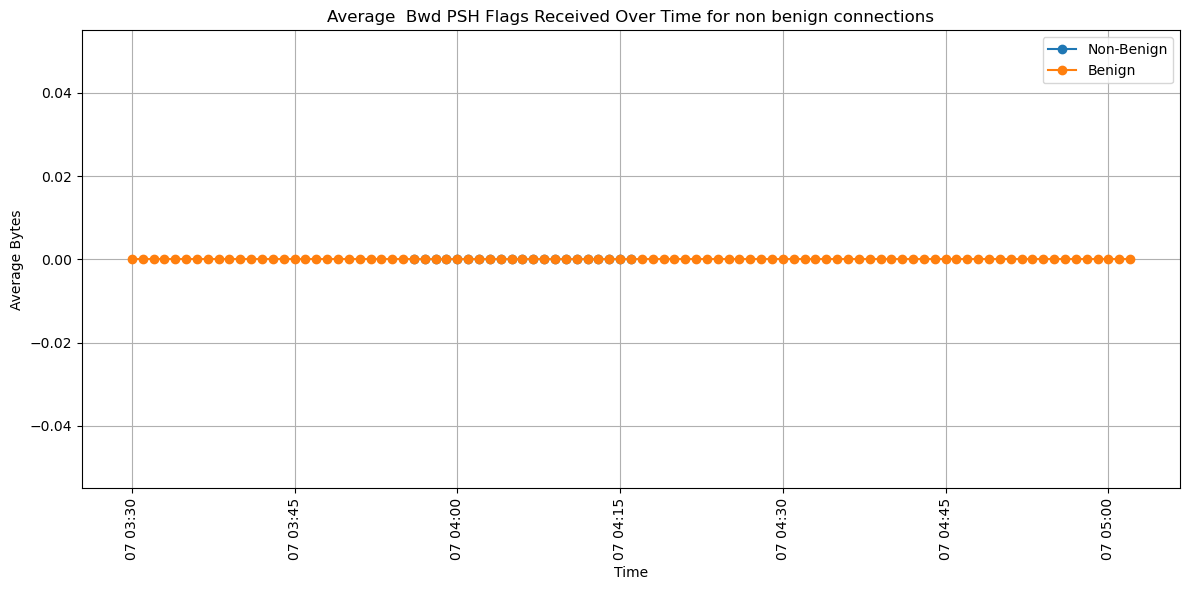

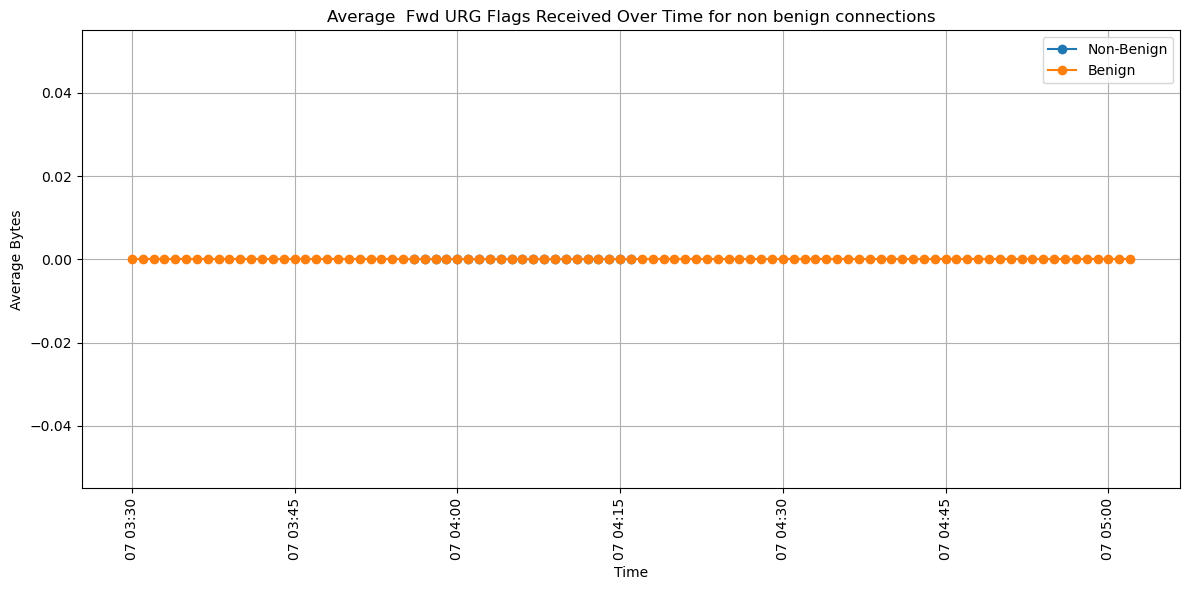

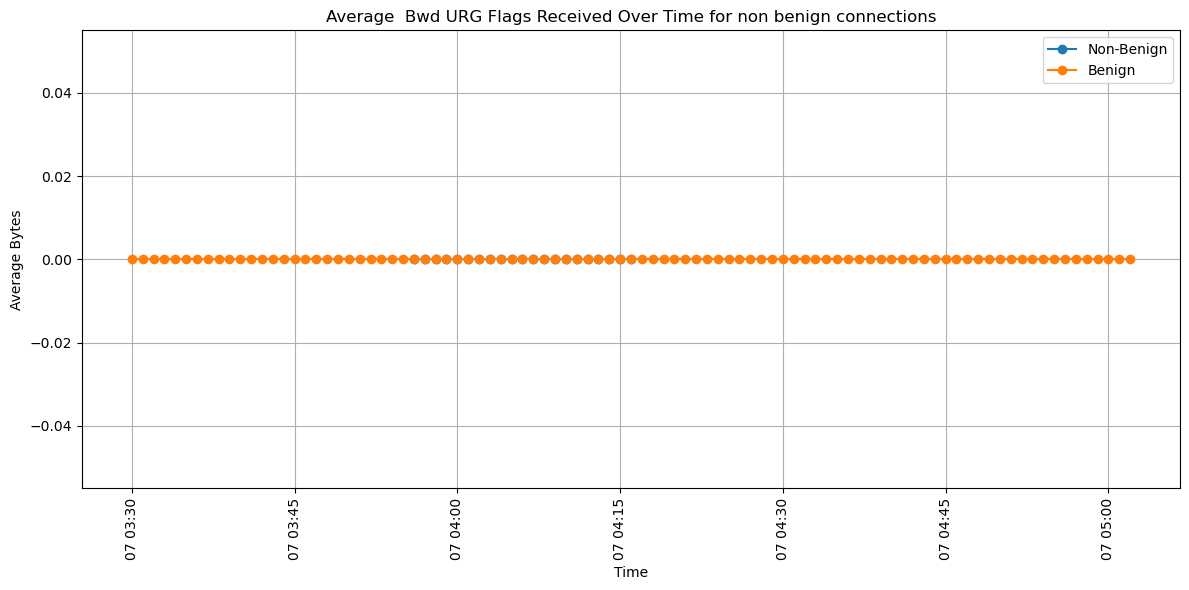

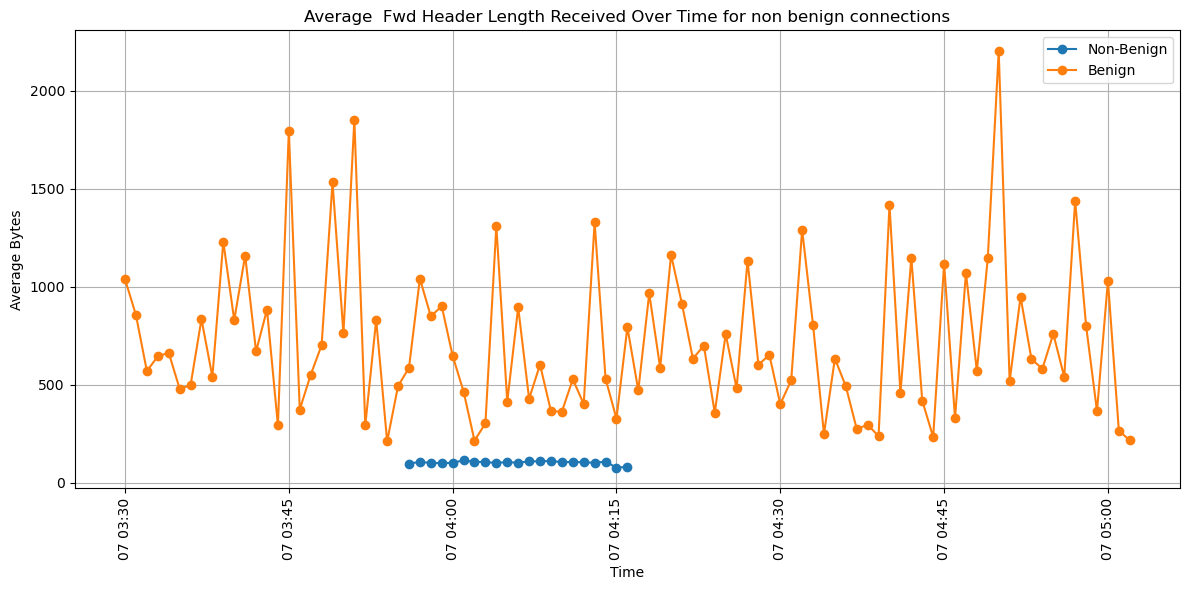

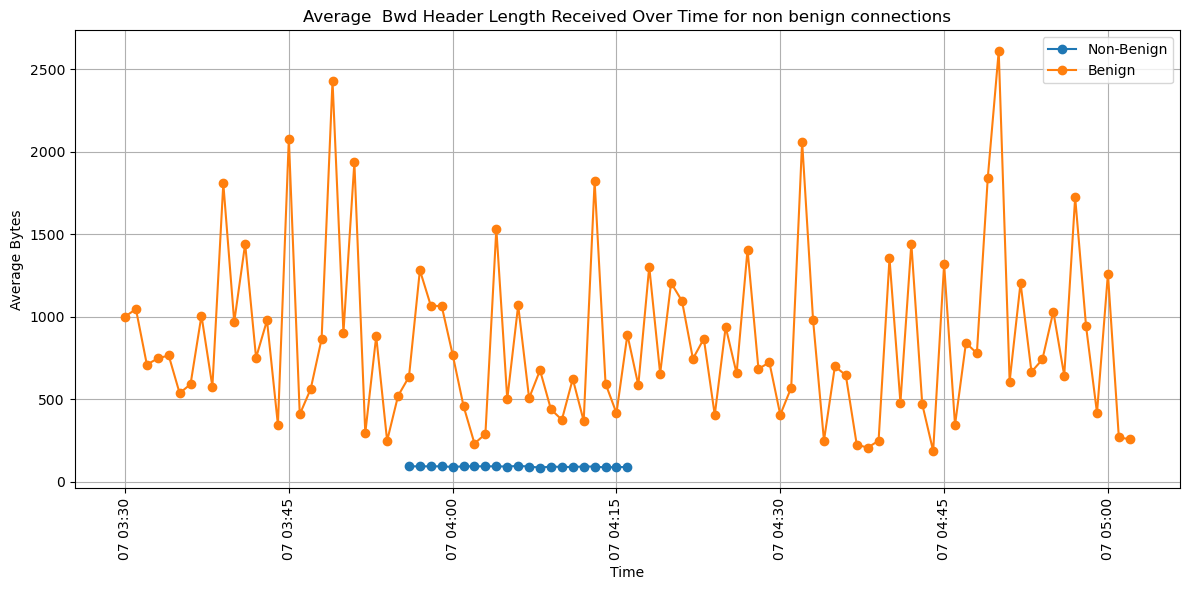

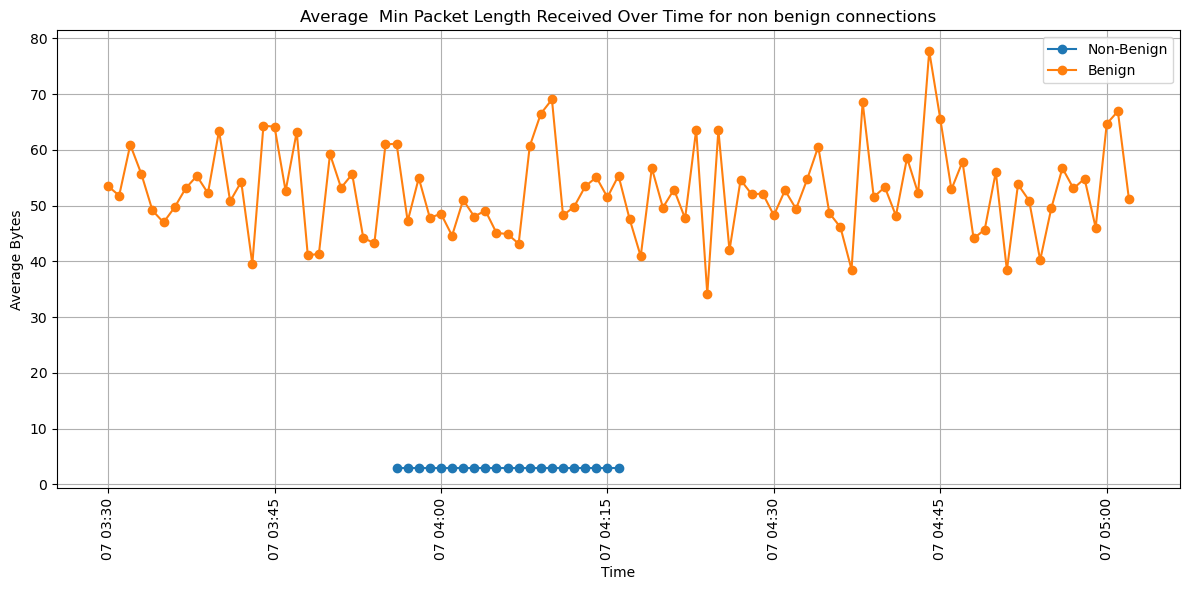

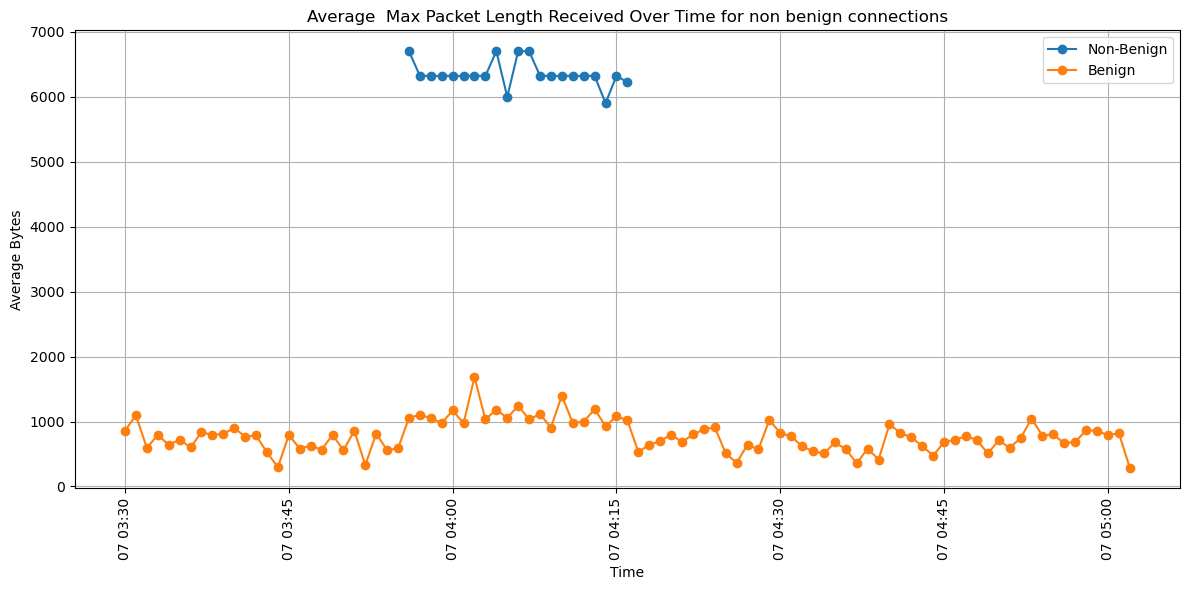

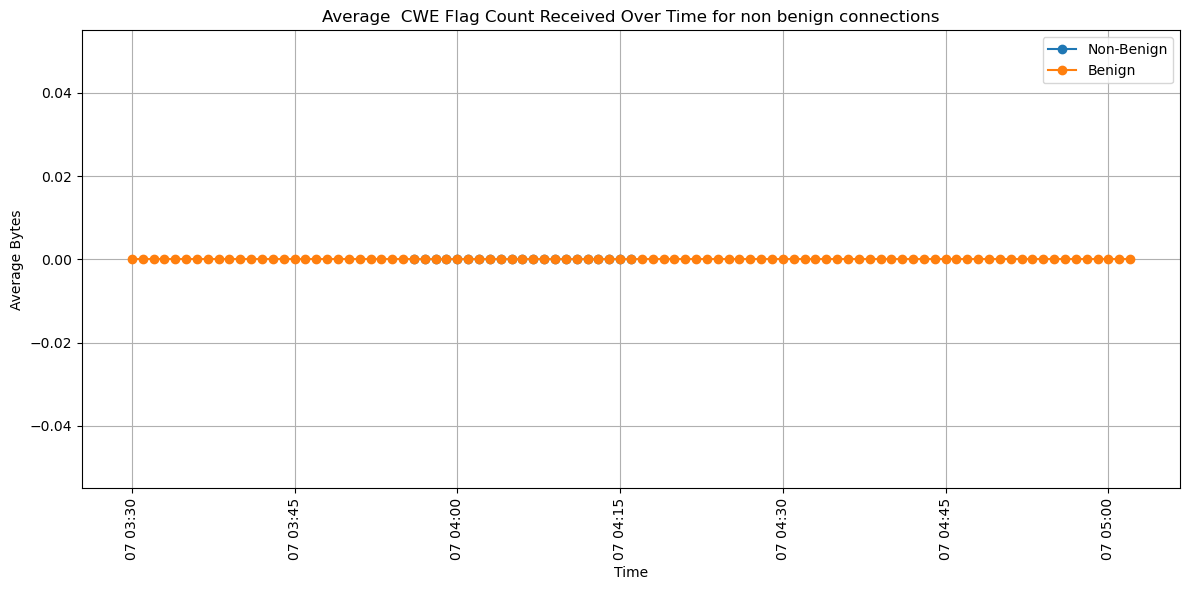

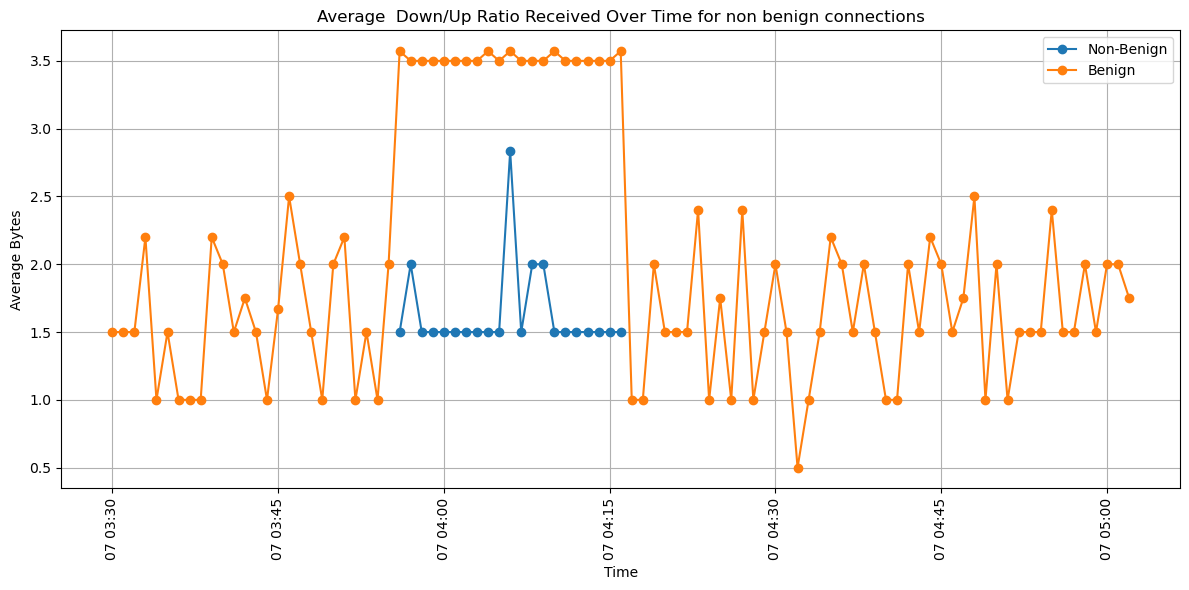

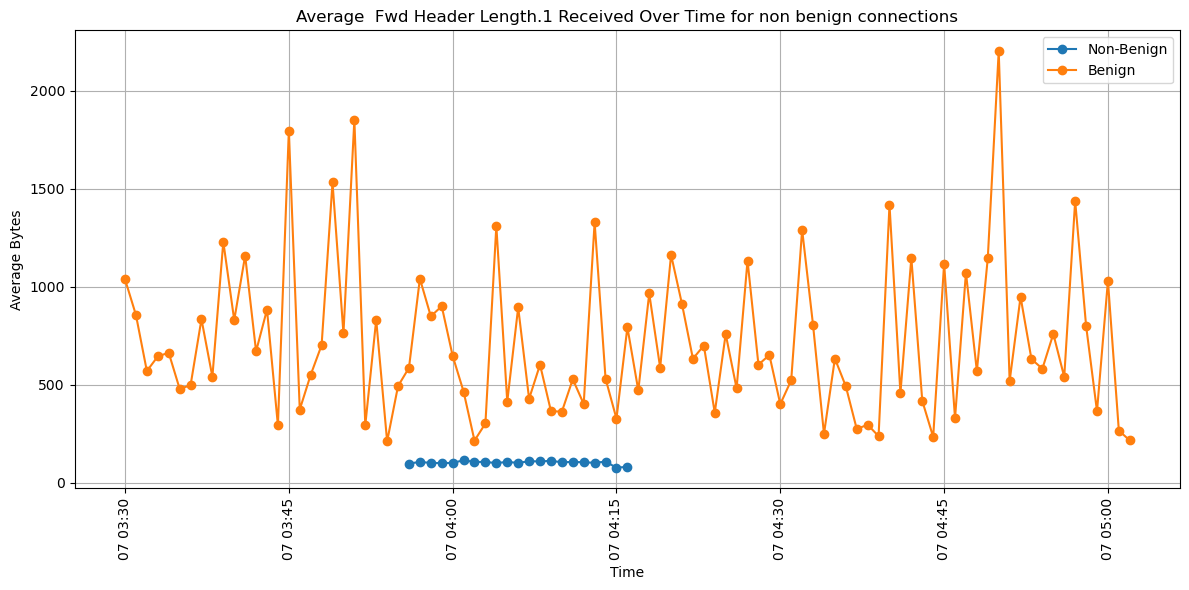

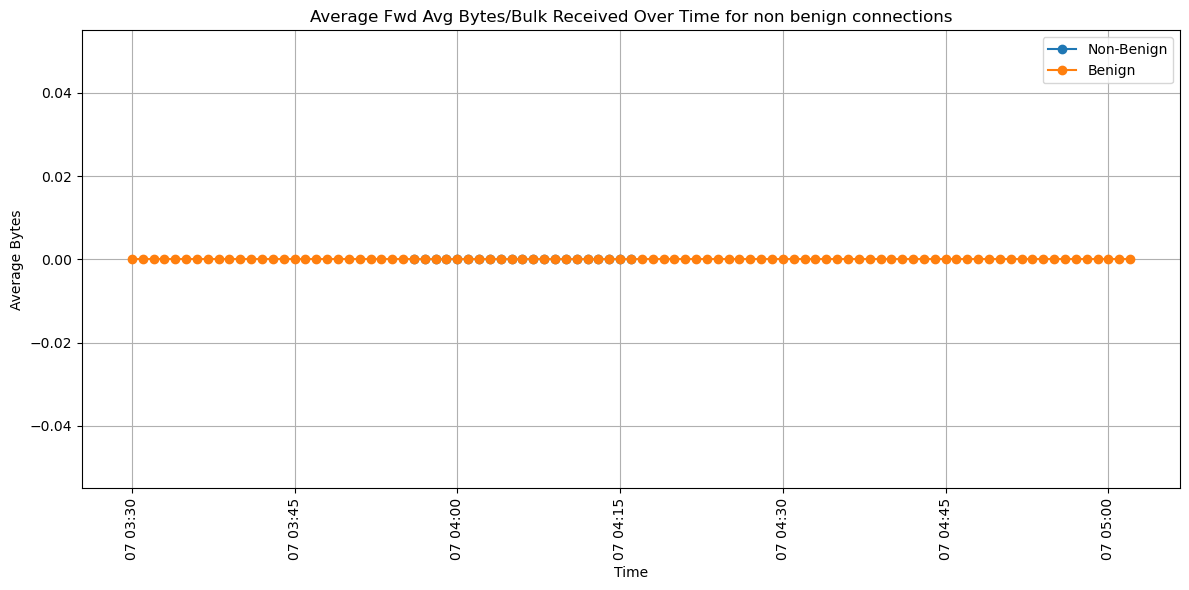

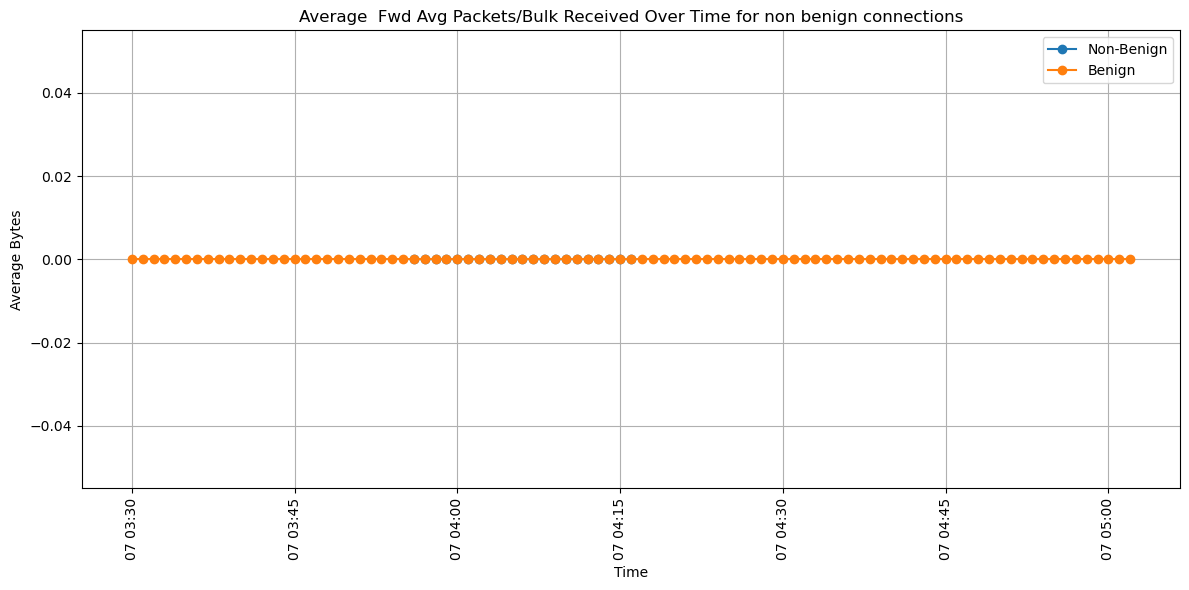

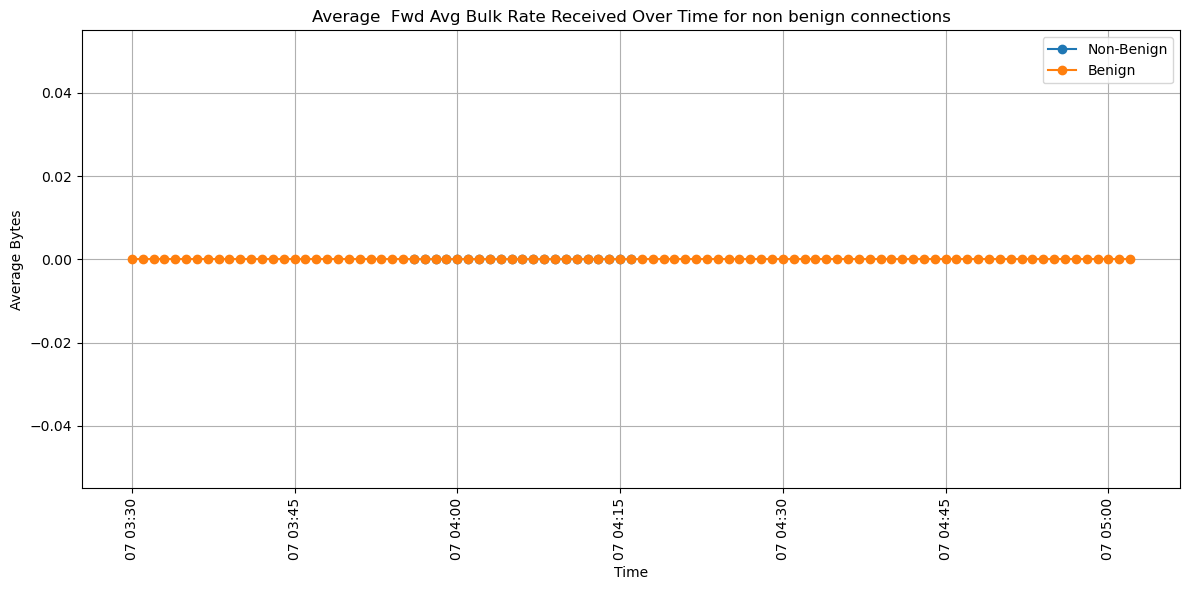

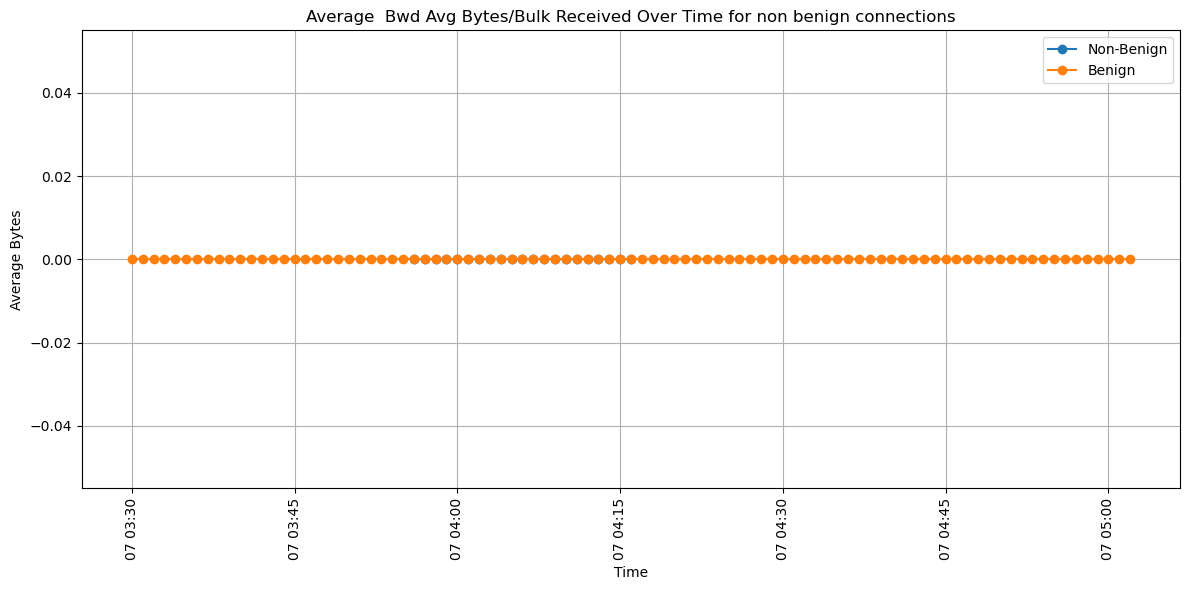

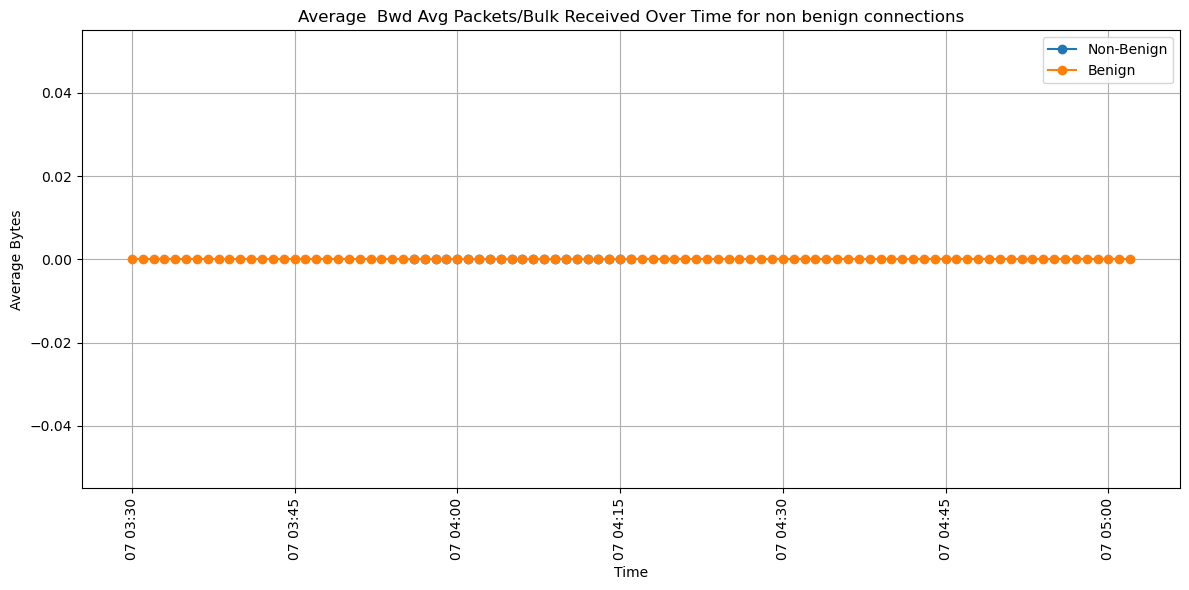

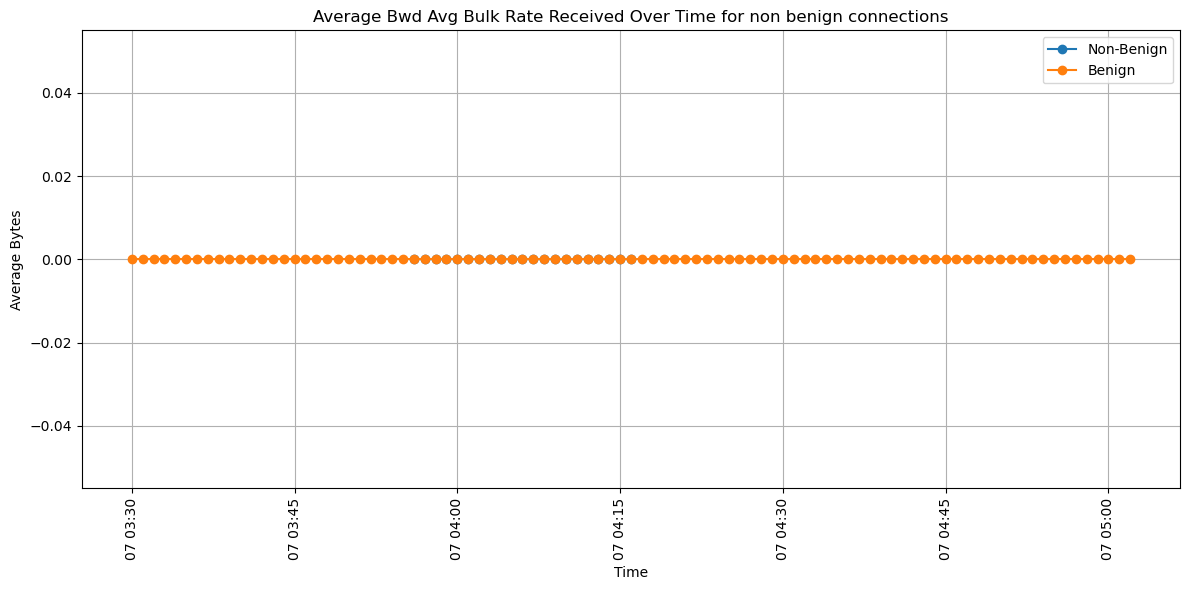

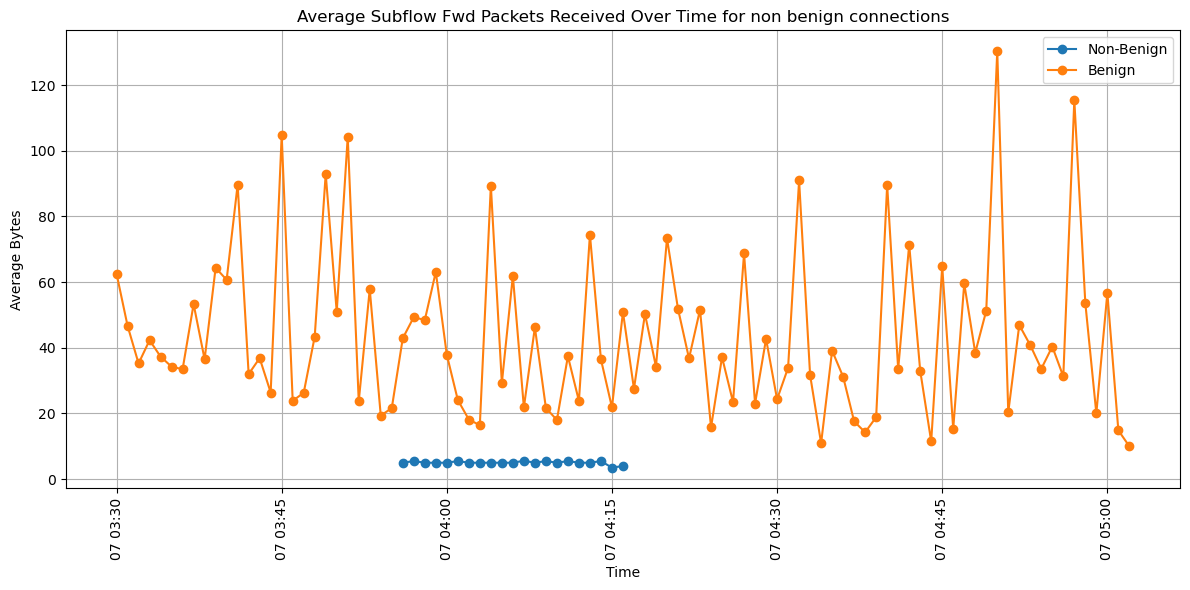

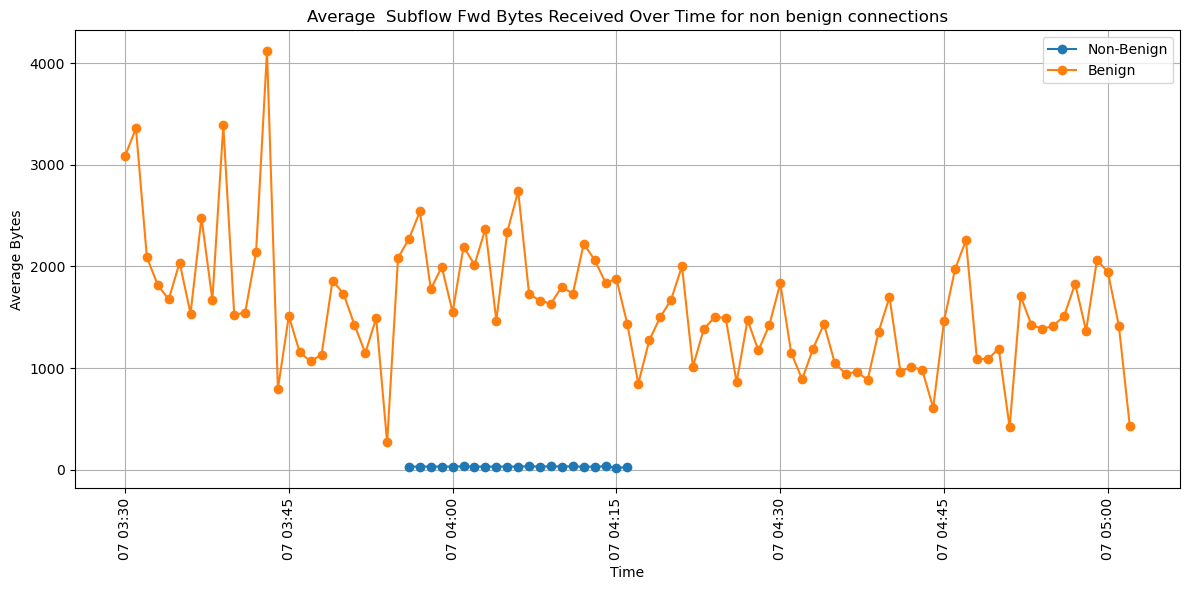

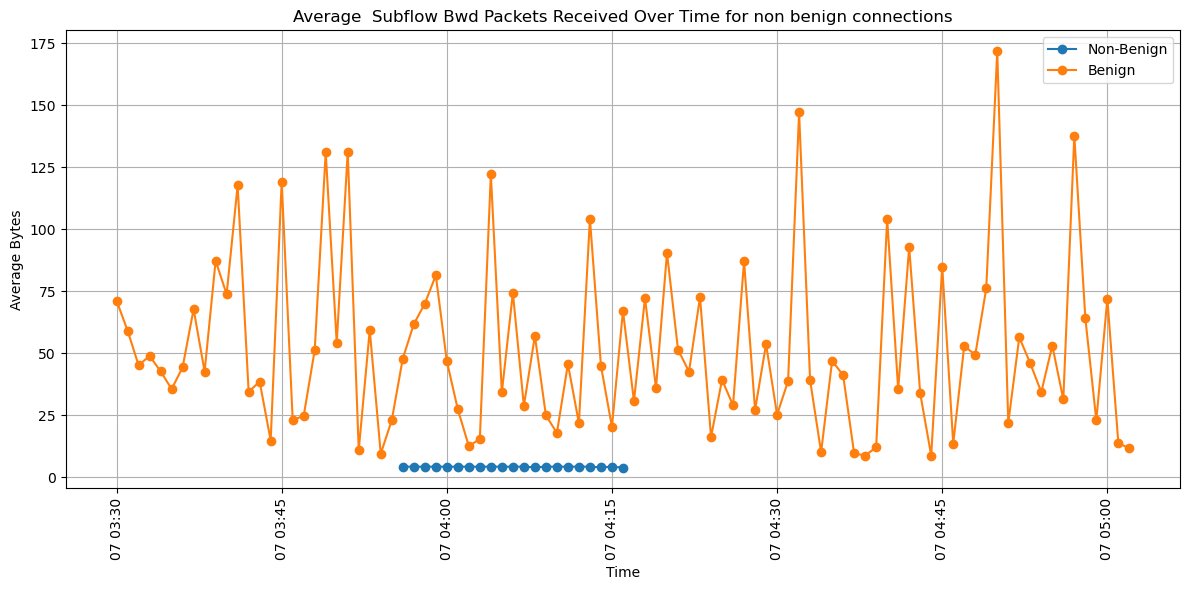

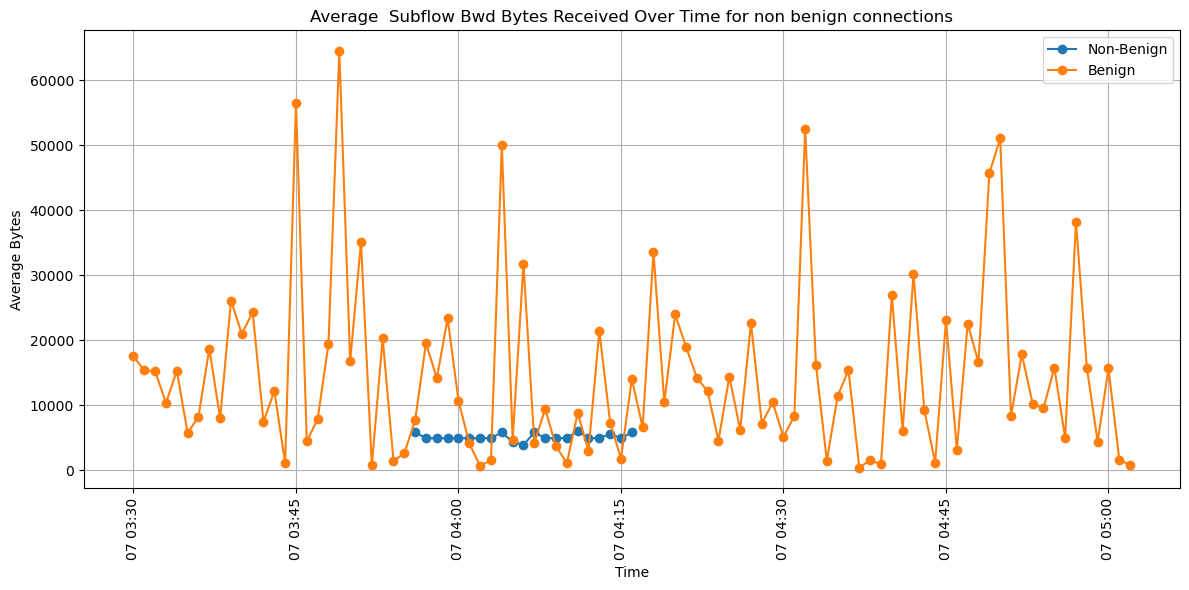

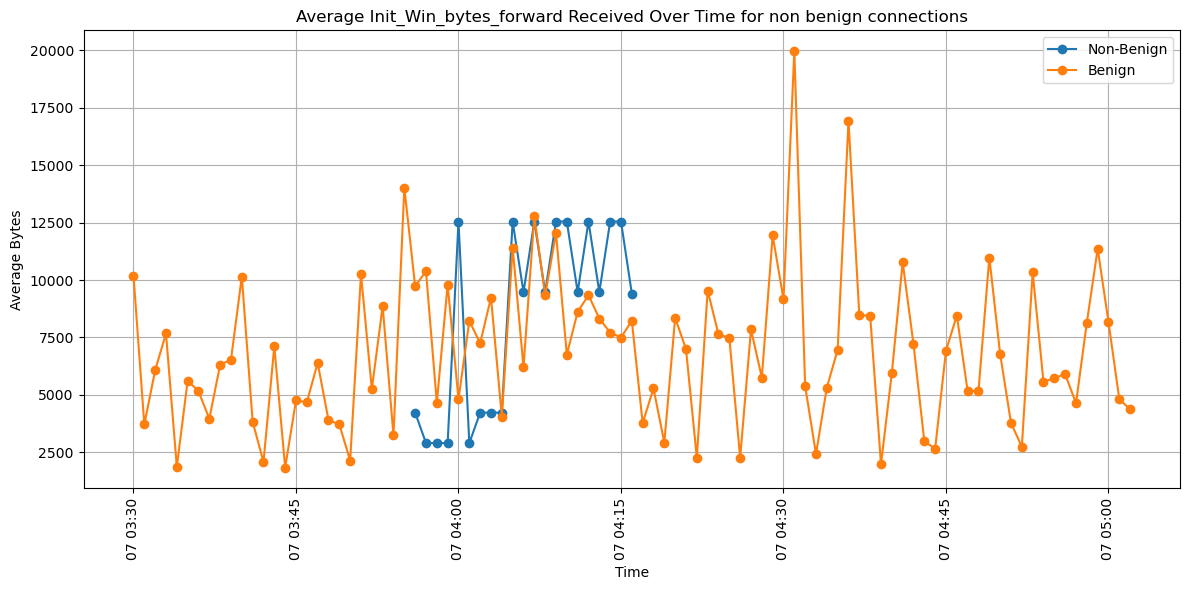

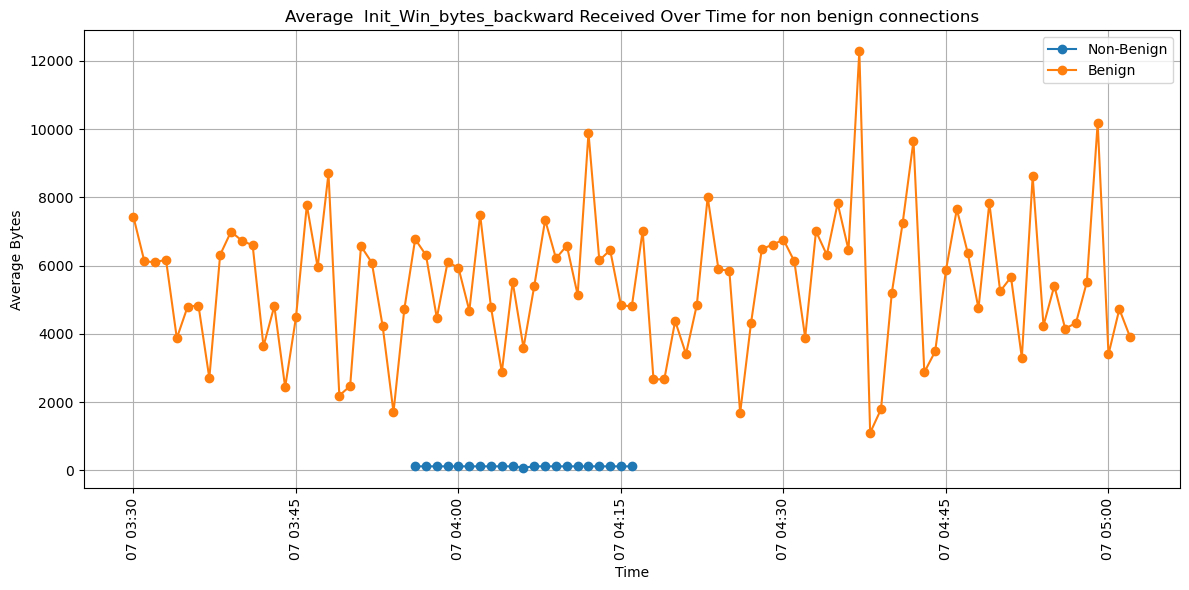

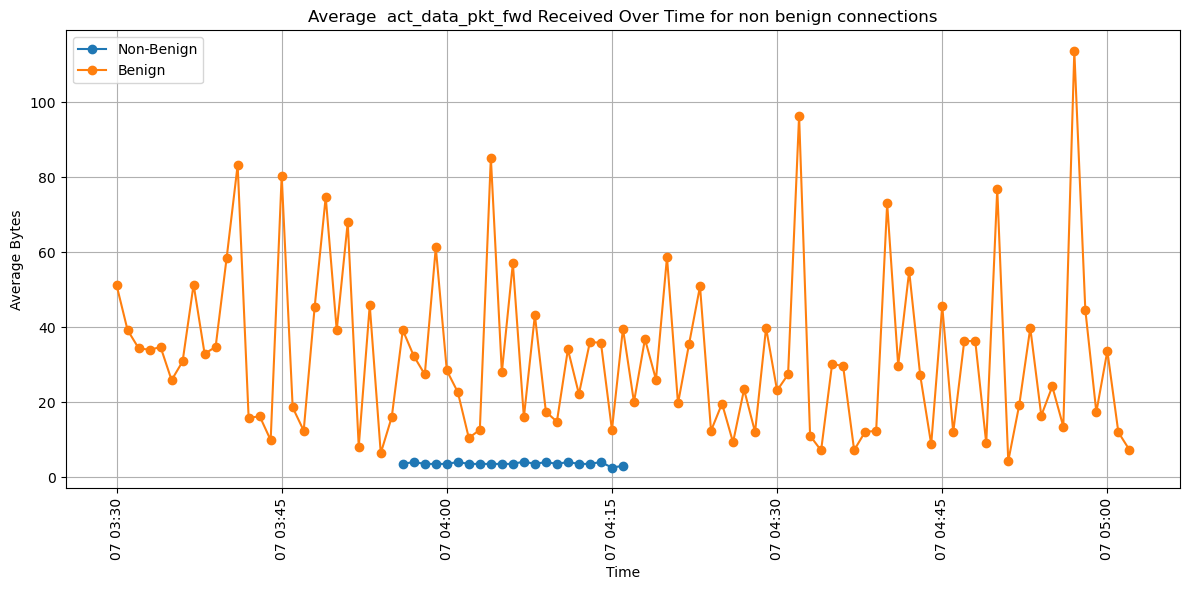

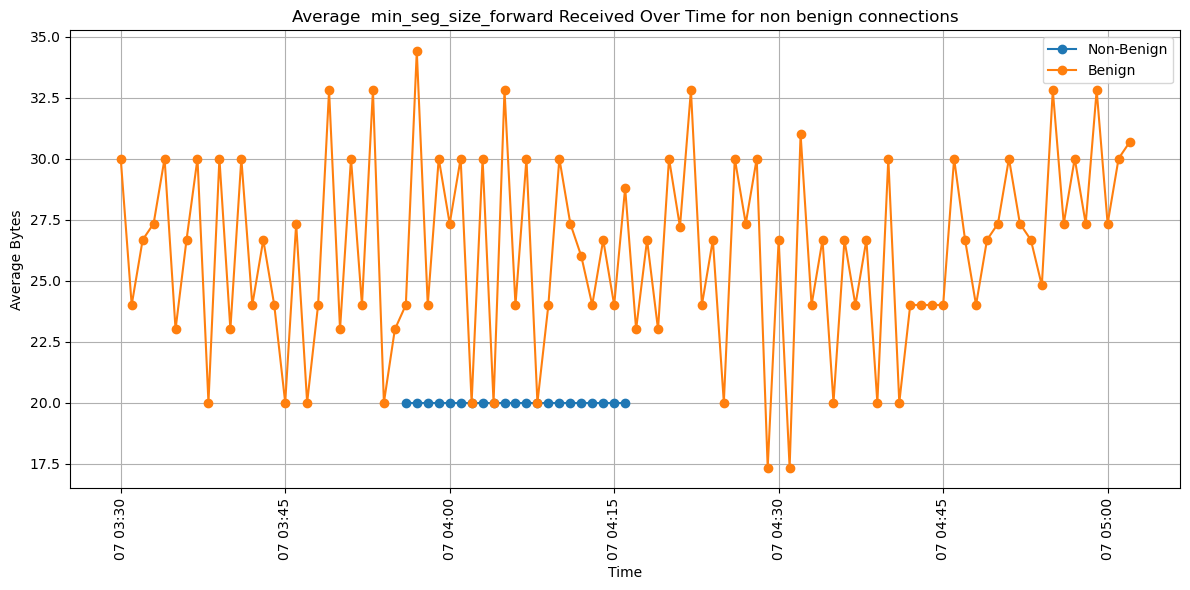

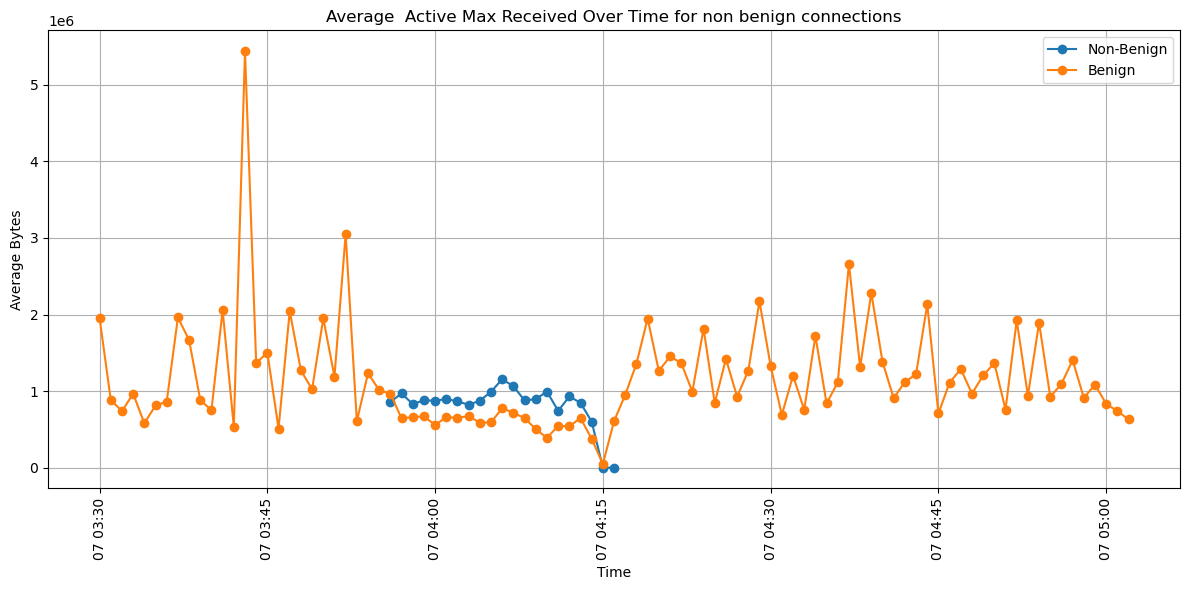

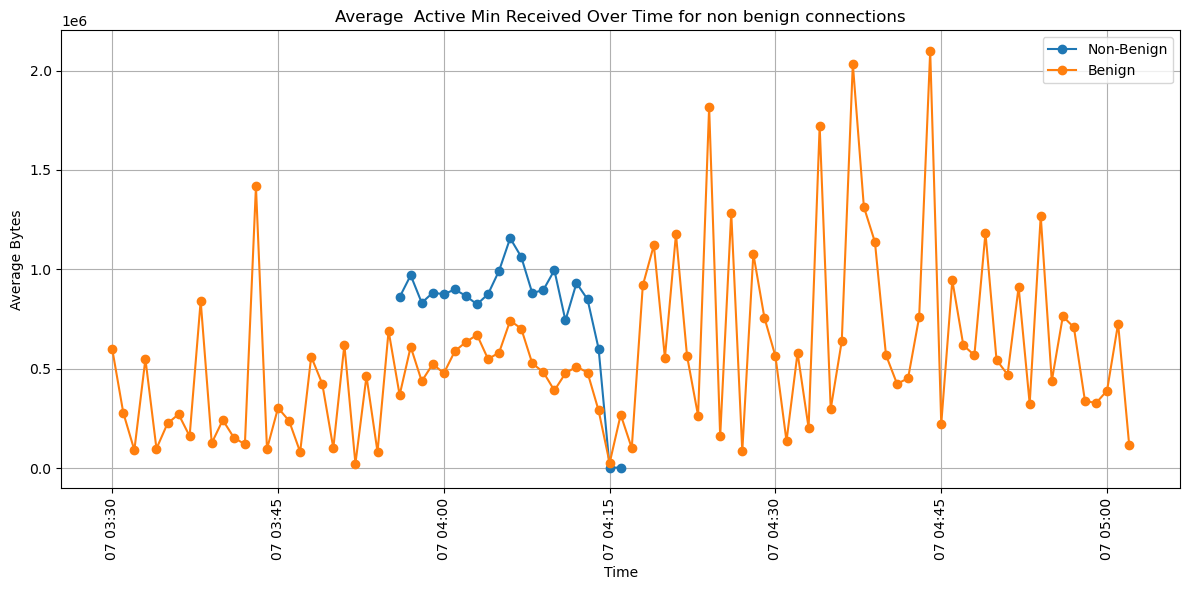

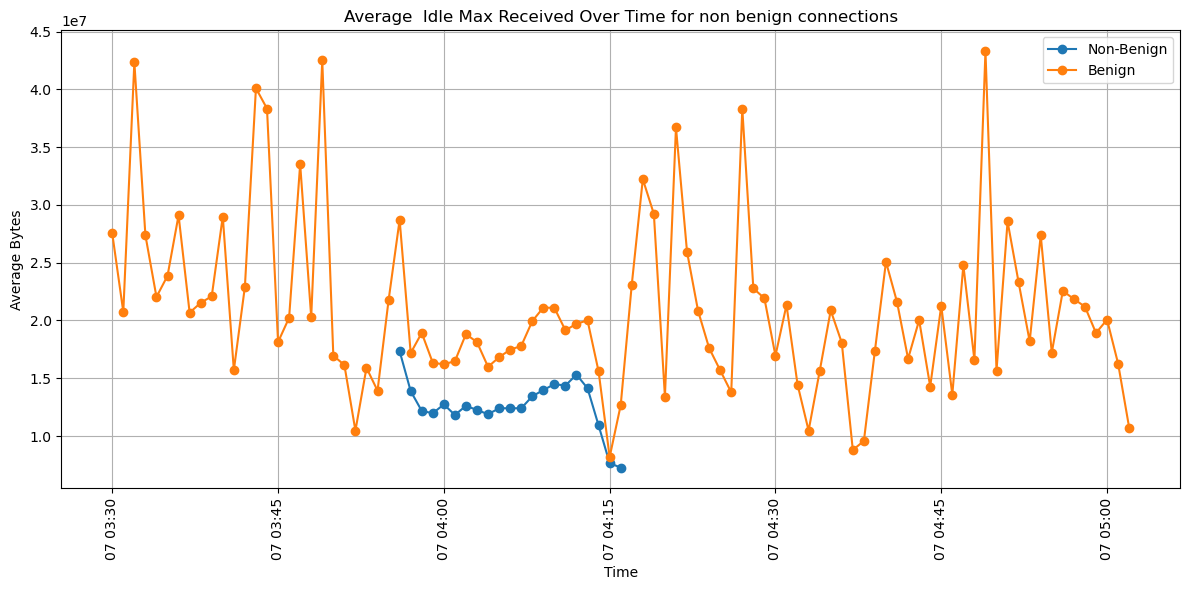

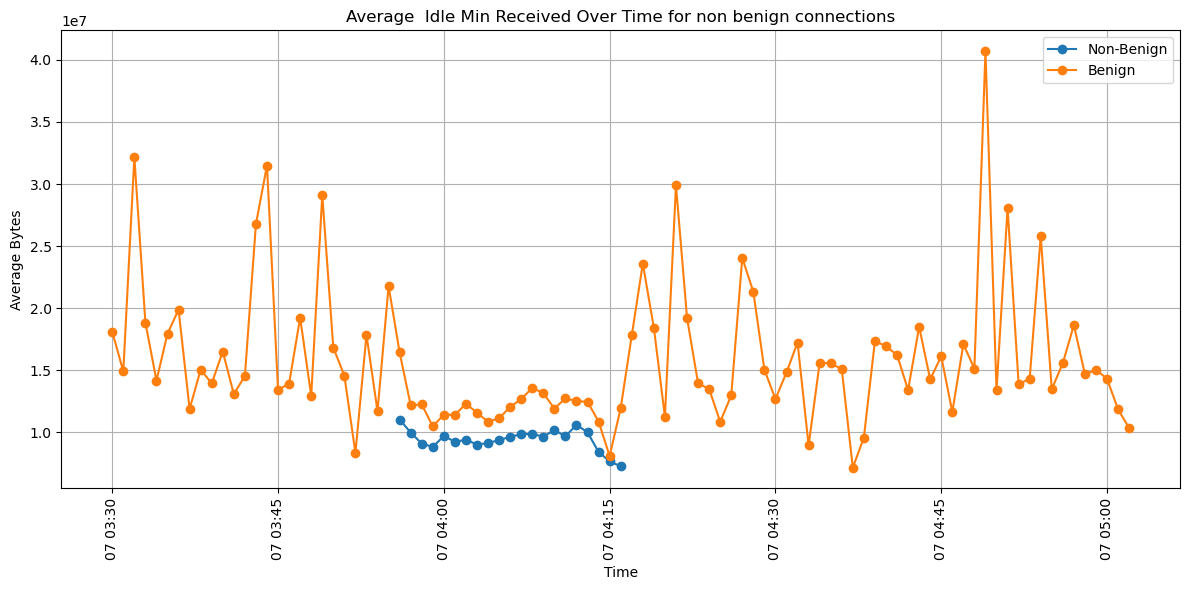

In [34]:
for i in discrete_vars_non_binary:
    if i !=' Timestamp':
        viz_variable(i)


# Data Cleaning and Transformation:

In [35]:
constant_columns=ddos_data.columns[ddos_data.nunique()==1]
constant_columns
len(constant_columns)

10

In [36]:
for column in constant_columns:
  print(f'The colonne {column} takes only one value:\n {ddos_data[column].value_counts()}\n')

The colonne  Bwd PSH Flags takes only one value:
 0    225745
Name:  Bwd PSH Flags, dtype: int64

The colonne  Fwd URG Flags takes only one value:
 0    225745
Name:  Fwd URG Flags, dtype: int64

The colonne  Bwd URG Flags takes only one value:
 0    225745
Name:  Bwd URG Flags, dtype: int64

The colonne  CWE Flag Count takes only one value:
 0    225745
Name:  CWE Flag Count, dtype: int64

The colonne Fwd Avg Bytes/Bulk takes only one value:
 0    225745
Name: Fwd Avg Bytes/Bulk, dtype: int64

The colonne  Fwd Avg Packets/Bulk takes only one value:
 0    225745
Name:  Fwd Avg Packets/Bulk, dtype: int64

The colonne  Fwd Avg Bulk Rate takes only one value:
 0    225745
Name:  Fwd Avg Bulk Rate, dtype: int64

The colonne  Bwd Avg Bytes/Bulk takes only one value:
 0    225745
Name:  Bwd Avg Bytes/Bulk, dtype: int64

The colonne  Bwd Avg Packets/Bulk takes only one value:
 0    225745
Name:  Bwd Avg Packets/Bulk, dtype: int64

The colonne Bwd Avg Bulk Rate takes only one value:
 0    2257

In [37]:
ddos_data[[ 'Flow ID',' Destination IP',' Source IP', ' Destination Port',' Source Port',' Protocol']]


Flow ID  Destination IP  \
0       192.168.10.5-104.16.207.165-54865-443-6    192.168.10.5   
1158      192.168.10.3-192.168.10.5-53-56771-17    192.168.10.3   
1157      192.168.10.3-192.168.10.5-53-55057-17    192.168.10.3   
1156      192.168.10.3-192.168.10.5-53-53400-17    192.168.10.3   
1155      192.168.10.3-192.168.10.5-53-62896-17    192.168.10.3   
...                                         ...             ...   
225640   192.168.10.3-192.168.10.19-53-20516-17    192.168.10.3   
225641   192.168.10.3-192.168.10.19-53-21215-17    192.168.10.3   
225642   192.168.10.3-192.168.10.19-53-48588-17    192.168.10.3   
225664  192.168.10.19-62.161.94.230-54279-443-6   62.161.94.230   
225744      192.168.10.15-8.43.72.21-61326-80-6   192.168.10.15   

             Source IP   Destination Port   Source Port   Protocol  
0       104.16.207.165              54865           443          6  
1158      192.168.10.5                 53         56771         17  
1157      192.168.10.5                 53         55057         17  
1156      192.168.10.5                 53         53400         17  
1155      192.168.10.5                 53         62896         17  
...                ...                ...           ...        ...  
225640   192.168.10.19                 53         20516         17  
225641   192.168.10.19                 53         21215         17  
225642   192.168.10.19                 53         48588         17  
225664   192.168.10.19                443         54279          6  
225744      8.43.72.21              61326            80          6  

[225745 rows x 6 columns]

In [38]:
are_equal = (ddos_data[' Fwd Header Length'] == ddos_data[' Fwd Header Length.1'])
all_equal = are_equal.all()
if all_equal:
    print("The two columns are the same.")
else:
    print("The two columns are not the same.")

The two columns are the same.


In [39]:
def dropping_const_and_red_columns(ddos_data):
    ddos_data.drop(['Flow ID',' Fwd Header Length.1'],axis=1,inplace=True)
    ddos_data.drop(columns=constant_columns,inplace=True)

In [40]:
dropping_const_and_red_columns(ddos_data)

# Label encoding for categorical features:

In [41]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Function to encode ' Label'
def encode_label_col(ddos_data):
    ddos_data[' Label'] = label_encoder.fit_transform(ddos_data[' Label'])

# Function to encode IP addresses
def encoding_ip_srv_dst(ddos_data):
    all_ip = pd.concat([ddos_data[' Source IP'], ddos_data[' Destination IP']])
    label_encoder.fit(all_ip)
    ddos_data[' Source IP'] = label_encoder.transform(ddos_data[' Source IP'])
    ddos_data[' Destination IP'] = label_encoder.transform(ddos_data[' Destination IP'])


In [42]:
encode_label_col(ddos_data)
encoding_ip_srv_dst(ddos_data)

In [43]:
ddos_data

Source IP   Source Port   Destination IP   Destination Port  \
0               24           443              871              54865   
1158           871         56771              870                 53   
1157           871         55057              870                 53   
1156           871         53400              870                 53   
1155           871         62896              870                 53   
...            ...           ...              ...                ...   
225640         867         20516              870                 53   
225641         867         21215              870                 53   
225642         867         48588              870                 53   
225664         867         54279             2209                443   
225744        2443            80              864              61326   

         Protocol           Timestamp   Flow Duration   Total Fwd Packets  \
0               6 2017-07-07 03:30:00               3                   2   
1158           17 2017-07-07 03:30:00           59362                   4   
1157           17 2017-07-07 03:30:00           61344                   4   
1156           17 2017-07-07 03:30:00             238                   2   
1155           17 2017-07-07 03:30:00           24052                   2   
...           ...                 ...             ...                 ...   
225640         17 2017-07-07 05:02:00             254                   2   
225641         17 2017-07-07 05:02:00             302                   2   
225642         17 2017-07-07 05:02:00             273                   2   
225664          6 2017-07-07 05:02:00              11                   2   
225744          6 2017-07-07 05:02:00              68                   1   

         Total Backward Packets  Total Length of Fwd Packets  ...  \
0                             0                           12  ...   
1158                          2                          152  ...   
1157                          2                          176  ...   
1156                          2                           82  ...   
1155                          2                          124  ...   
...                         ...                          ...  ...   
225640                        2                           70  ...   
225641                        2                           70  ...   
225642                        2                           70  ...   
225664                        0                           12  ...   
225744                        1                            6  ...   

         min_seg_size_forward  Active Mean   Active Std   Active Max  \
0                          20          0.0          0.0            0   
1158                       20          0.0          0.0            0   
1157                       20          0.0          0.0            0   
1156                       20          0.0          0.0            0   
1155                       20          0.0          0.0            0   
...                       ...          ...          ...          ...   
225640                     40          0.0          0.0            0   
225641                     40          0.0          0.0            0   
225642                     32          0.0          0.0            0   
225664                     20          0.0          0.0            0   
225744                     20          0.0          0.0            0   

         Active Min  Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0                 0        0.0        0.0          0          0       0  
1158              0        0.0        0.0          0          0       0  
1157              0        0.0        0.0          0          0       0  
1156              0        0.0        0.0          0          0       0  
1155              0        0.0        0.0          0          0       0  
...             ...        ...        ...        ...        ...     ...  
225640 

In [44]:
ddos_data_cp=ddos_data.drop(' Timestamp',axis=1)

# Correlation analysis and feature selection:¶


In [45]:
ddos_data_cp.corr()

Source IP   Source Port   Destination IP  \
 Source IP           1.000000     -0.364323        -0.010057   
 Source Port        -0.364323      1.000000         0.292387   
 Destination IP     -0.010057      0.292387         1.000000   
 Destination Port    0.454587     -0.727093        -0.374056   
 Protocol            0.298156      0.193702         0.003325   
...                       ...           ...              ...   
Idle Mean           -0.084251      0.051217        -0.111537   
 Idle Std           -0.067886      0.040340        -0.082802   
 Idle Max           -0.090827      0.055066        -0.118200   
 Idle Min           -0.062509      0.037903        -0.085869   
 Label              -0.752707      0.388721         0.019534   

                    Destination Port   Protocol   Flow Duration  \
 Source IP                  0.454587   0.298156       -0.040601   
 Source Port               -0.727093   0.193702        0.066677   
 Destination IP            -0.374056   0.003325       -0.045646   
 Destination Port           1.000000  -0.183045        0.107038   
 Protocol                  -0.183045   1.000000       -0.194691   
...                              ...        ...             ...   
Idle Mean                   0.132272  -0.169636        0.871855   
 Idle Std                   0.110687  -0.116058        0.630604   
 Idle Max                   0.144428  -0.176677        0.919199   
 Idle Min                   0.095687  -0.133858        0.672003   
 Label                     -0.509798  -0.471904        0.025923   

                    Total Fwd Packets   Total Backward Packets  \
 Source IP                   0.020113                 0.038123   
 Source Port                 0.046492                -0.005598   
 Destination IP              0.054167                 0.011315   
 Destination Port           -0.044270                 0.008321   
 Protocol                   -0.077461                -0.052777   
...                               ...                      ...   
Idle Mean                    0.110787                 0.065554   
 Idle Std                    0.056807                 0.028627   
 Idle Max                    0.109429                 0.062932   
 Idle Min                    0.094747                 0.058056   
 Label                      -0.029870                -0.069290   

                   Total Length of Fwd Packets   Total Length of Bwd Packets  \
 Source IP                            0.210294                     -0.037069   
 Source Port                         -0.376220                      0.053109   
 Destination IP                      -0.209284                      0.026897   
 Destination Port                     0.553843                     -0.066648   
 Protocol                            -0.107639                     -0.060670   
...                                        ...                           ...   
Idle Mean                             0.261110                      0.042256   
 Idle Std                             0.216771                      0.020081   
 Idle Max                             0.284694                      0.041055   
 Idle Min                             0.188569                      0.036789   
 Label                               -0.319693                      0.041244   

                   ...   min_seg_size_forward  Active Mean   Active Std  \
 Source IP         ...               0.289566    -0.022408     0.079552   
 Source Port       ...               0.051752     0.035426     0.015362   
 Destination IP    ...               0.166936    -0.036924     0.081243   
 Destination Port  ...              -0.074278     0.061313    -0.026592   
 Protocol          ...               0.474116    -0.096252    -0.033096   
...                ...                    ...          ...          ...   
Idle Mean          ...              -0.139772     0.595859     0.022025   
 Idle Std          ...              -0.099363    -0.057820    -0.003866   
 Idle Max        

In [46]:
correlation_matrix = ddos_data_cp.corr()

# Get the highly correlated features (absolute correlation > 0.5)
highly_correlated = correlation_matrix.abs() > 0.9

# Extract the indices of highly correlated features
correlated_features = [(feature1, feature2) for feature1 in correlation_matrix.columns 
                       for feature2 in correlation_matrix.columns 
                       if highly_correlated.loc[feature1, feature2] and feature1 != feature2]

# Print the highly correlated feature pairs
printed_pairs = set()
for feature1, feature2 in correlated_features:
    if (feature2, feature1) not in printed_pairs:  # Check if the pair has already been printed
        print(f"{feature1} and {feature2} are highly correlated: {correlation_matrix.loc[feature1, feature2]}")
        printed_pairs.add((feature1, feature2)) 

 Flow Duration and  Flow IAT Max are highly correlated: 0.9202572641153386
 Flow Duration and Fwd IAT Total are highly correlated: 0.9970539718291983
 Flow Duration and  Fwd IAT Max are highly correlated: 0.9179458157781236
 Flow Duration and  Idle Max are highly correlated: 0.9191990945209536
 Total Fwd Packets and  Total Backward Packets are highly correlated: 0.9567137090959948
 Total Fwd Packets and  Total Length of Bwd Packets are highly correlated: 0.938469804025713
 Total Fwd Packets and  Fwd Header Length are highly correlated: 0.9684337767327689
 Total Fwd Packets and  Bwd Header Length are highly correlated: 0.9287367502694396
 Total Fwd Packets and Subflow Fwd Packets are highly correlated: 1.0
 Total Fwd Packets and  Subflow Bwd Packets are highly correlated: 0.9567137090959948
 Total Fwd Packets and  Subflow Bwd Bytes are highly correlated: 0.938469804025713
 Total Backward Packets and  Total Length of Bwd Packets are highly correlated: 0.9704220020372509
 Total Backward P

In [47]:
corr_set1=[' Flow Duration',' Flow IAT Max','Fwd IAT Total',' Fwd IAT Max',' Idle Max']
# Calculate the correlation between the features and the 'Label' column
correlation_set1 = ddos_data[corr_set1 + [' Label']].corr()

# Get the correlation of each feature with the 'Label' column
label_correlation_set1 = correlation_set1[' Label'].drop(' Label')

print(label_correlation_set1)

 Flow Duration    0.025923
 Flow IAT Max     0.100654
Fwd IAT Total     0.040565
 Fwd IAT Max      0.105457
 Idle Max         0.096775
Name:  Label, dtype: float64


In [48]:
ddos_data.drop(columns=[' Flow Duration',' Flow IAT Max','Fwd IAT Total',' Idle Max'],inplace=True)


In [49]:
corr_set2=[' Total Fwd Packets',' Total Backward Packets',' Total Length of Bwd Packets',' Fwd Header Length',' Bwd Header Length','Subflow Fwd Packets',' Subflow Bwd Packets',' Subflow Bwd Bytes']
# Calculate the correlation between the features and the 'Label' column

correlation_set2 = ddos_data[corr_set2 + [' Label']].corr()

# Get the correlation of each feature with the 'Label' column
label_correlation_set2 = correlation_set2[' Label'].drop(' Label')

print(label_correlation_set2)

 Total Fwd Packets             -0.029870
 Total Backward Packets        -0.069290
 Total Length of Bwd Packets    0.041244
 Fwd Header Length             -0.043942
 Bwd Header Length             -0.076183
Subflow Fwd Packets            -0.029870
 Subflow Bwd Packets           -0.069290
 Subflow Bwd Bytes              0.041244
Name:  Label, dtype: float64


In [50]:
ddos_data.drop(columns=[' Total Fwd Packets',' Total Backward Packets',' Total Length of Bwd Packets',' Fwd Header Length','Subflow Fwd Packets',' Subflow Bwd Packets',' Subflow Bwd Bytes'],inplace=True)

In [51]:
ddos_data.drop(['Fwd PSH Flags',' RST Flag Count'],axis=1,inplace=True)

In [52]:
ddos_data.drop([' Subflow Fwd Bytes',' Fwd Packet Length Mean'],axis=1,inplace=True)


In [53]:
corr_set3=[' Fwd Packet Length Max',' Fwd Packet Length Std',' Avg Fwd Segment Size']

correlation_set3 = ddos_data[corr_set3 + [' Label']].corr()

# Get the correlation of each feature with the 'Label' column
label_correlation_set3 = correlation_set3[' Label'].drop(' Label')

print(label_correlation_set3)


 Fwd Packet Length Max   -0.321529
 Fwd Packet Length Std   -0.300271
 Avg Fwd Segment Size    -0.356895
Name:  Label, dtype: float64


In [54]:
ddos_data.drop([' Fwd Packet Length Max',' Fwd Packet Length Std'],axis=1,inplace=True)

In [55]:
corr_set4=['Bwd Packet Length Max',' Bwd Packet Length Mean',' Bwd Packet Length Std',' Avg Bwd Segment Size']
correlation_set4 = ddos_data[corr_set4 + [' Label']].corr()

# Get the correlation of each feature with the 'Label' column
label_correlation_set4 = correlation_set4[' Label'].drop(' Label')

print(label_correlation_set4)

Bwd Packet Length Max      0.577323
 Bwd Packet Length Mean    0.603299
 Bwd Packet Length Std     0.576155
 Avg Bwd Segment Size      0.603299
Name:  Label, dtype: float64


In [56]:
ddos_data.drop(['Bwd Packet Length Max',' Bwd Packet Length Mean',' Bwd Packet Length Std'],axis=1,inplace=True)


In [57]:
corr_set5=[' Flow IAT Mean',' Flow IAT Std',' Fwd IAT Mean',' Fwd IAT Std',' Fwd IAT Max','Idle Mean',' Fwd IAT Min',' Bwd IAT Min',' Bwd IAT Max']
correlation_set5 = ddos_data[corr_set5 + [' Label']].corr()

# Get the correlation of each feature with the 'Label' column
label_correlation_set5 = correlation_set5[' Label'].drop(' Label')

print(label_correlation_set5)


 Flow IAT Mean    0.127503
 Flow IAT Std     0.129630
 Fwd IAT Mean     0.022030
 Fwd IAT Std      0.099651
 Fwd IAT Max      0.105457
Idle Mean         0.087114
 Fwd IAT Min     -0.061743
 Bwd IAT Min     -0.064277
 Bwd IAT Max     -0.292054
Name:  Label, dtype: float64


In [58]:
ddos_data.drop([' Flow IAT Mean',' Flow IAT Std',' Fwd IAT Mean',' Fwd IAT Std',' Fwd IAT Max','Idle Mean',' Fwd IAT Min',' Bwd IAT Min'],axis=1,inplace=True)

In [59]:
corr_set6=[' Bwd IAT Std',' Bwd IAT Max',' Max Packet Length',' Packet Length Mean',' Packet Length Std',' Packet Length Variance',' Average Packet Size']
correlation_set6 = ddos_data[corr_set6 + [' Label']].corr()

# Get the correlation of each feature with the 'Label' column
label_correlation_set6 = correlation_set6[' Label'].drop(' Label')

print(label_correlation_set6)

 Bwd IAT Std              -0.290896
 Bwd IAT Max              -0.292054
 Max Packet Length         0.414399
 Packet Length Mean        0.454283
 Packet Length Std         0.443749
 Packet Length Variance    0.408089
 Average Packet Size       0.453472
Name:  Label, dtype: float64


In [60]:
ddos_data.drop(columns=[' Bwd IAT Std',' Bwd IAT Max',' Max Packet Length',' Packet Length Std',' Packet Length Variance',' Average Packet Size'],axis=1,inplace=True)

In [61]:
corr_set7=['Active Mean',' Active Max',' Active Min']
correlation_set7 = ddos_data[corr_set7 + [' Label']].corr()

# Get the correlation of each feature with the 'Label' column
label_correlation_set7 = correlation_set7[' Label'].drop(' Label')

print(label_correlation_set7)

Active Mean    0.022905
 Active Max   -0.009271
 Active Min    0.033821
Name:  Label, dtype: float64


In [62]:
ddos_data.drop(columns=['Active Mean',' Active Max'],inplace=True)

In [63]:
ddos_data.corr()

/tmp/ipykernel_11165/1902775582.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ddos_data.corr()


Source IP   Source Port   Destination IP  \
 Source IP                     1.000000     -0.364323        -0.010057   
 Source Port                  -0.364323      1.000000         0.292387   
 Destination IP               -0.010057      0.292387         1.000000   
 Destination Port              0.454587     -0.727093        -0.374056   
 Protocol                      0.298156      0.193702         0.003325   
Total Length of Fwd Packets    0.210294     -0.376220        -0.209284   
 Fwd Packet Length Min         0.123614     -0.183577        -0.129450   
 Bwd Packet Length Min         0.235521      0.149612        -0.005483   
Flow Bytes/s                   0.030494     -0.010242         0.001423   
 Flow Packets/s                0.175986     -0.129796         0.014954   
 Flow IAT Min                  0.020884      0.016963        -0.012435   
Bwd IAT Total                  0.204959     -0.232059        -0.084021   
 Bwd IAT Mean                  0.133799     -0.127057        -0.089757   
 Bwd Header Length             0.042806      0.002305         0.021775   
Fwd Packets/s                  0.163385     -0.127211         0.014634   
 Bwd Packets/s                 0.109215     -0.043198         0.007999   
 Min Packet Length             0.280287      0.163950        -0.010907   
 Packet Length Mean           -0.361034      0.076026        -0.070699   
FIN Flag Count                 0.038475      0.007409         0.030483   
 SYN Flag Count                0.175666     -0.224469        -0.114964   
 PSH Flag Count               -0.214044      0.076034         0.142037   
 ACK Flag Count               -0.010616     -0.216516        -0.149286   
 URG Flag Count                0.394563     -0.622203        -0.343575   
 ECE Flag Count                0.008084      0.009820         0.022644   
 Down/Up Ratio                 0.200767     -0.442332        -0.294870   
 Avg Fwd Segment Size          0.235101     -0.462935        -0.282593   
 Avg Bwd Segment Size         -0.460018      0.307940         0.045612   
Init_Win_bytes_forward         0.032815      0.059325         0.301908   
 Init_Win_bytes_backward       0.165985     -0.028756         0.162807   
 act_data_pkt_fwd             -0.011737      0.053464         0.041041   
 min_seg_size_forward          0.289566      0.051752         0.166936   
 Active Std                    0.079552      0.015362         0.081243   
 Active Min                   -0.037990      0.034631        -0.050291   
 Idle Std                     -0.067886      0.040340        -0.082802   
 Idle Min                     -0.062509      0.037903        -0.085869   
 Label                        -0.752707      0.388721         0.019534   

                              Destination Port   Protocol  \
 Source IP                            0.454587   0.298156   
 Source Port                         -0.727093   0.193702   
 Destination IP                      -0.374056   0.003325   
 Destination Port                     1.000000  -0.183045   
 Protocol                            -0.183045   1.000000   
Total Length of Fwd Packets           0.553843  -0.107639   
 Fwd Packet Length Min                0.207158   0.038159   
 Bwd Packet Length Min               -0.119517   0.725937   
Flow Bytes/s                          0.025816   0.010361   
 Flow Packets/s                       0.142714  -0.000067   
 Flow IAT Min                        -0.010994  -0.004701   
Bwd IAT Total                         0.342850  -0.097061   
 Bwd IAT Mean                         0.209530   0.029998   
 Bwd Header Length                   -0.001490  -0.048408   
Fwd Packets/s                         0.141705  -0.010460   
 Bwd Packets/s                        0.036687   0.057474   
 Min Packet Length                   -0.150844   0.894556   
 Packet Length Mean                  -0.076975  -0.330337   
FIN Flag Count                       -0.008655  -0.021336   
 SYN Flag Count                       0.267683  -0.076427   
 PSH Flag 

In [64]:
# Compute the correlation matrix
correlation_matrix = ddos_data_cp.corr()

# Select the correlation values of the 'Label' column
label_correlation = correlation_matrix[' Label']

# Print the correlation values
print(label_correlation)

 Source IP          -0.752707
 Source Port         0.388721
 Destination IP      0.019534
 Destination Port   -0.509798
 Protocol           -0.471904
                       ...   
Idle Mean            0.087114
 Idle Std            0.078023
 Idle Max            0.096775
 Idle Min            0.061243
 Label               1.000000
Name:  Label, Length: 72, dtype: float64


# Setting Timestamp as an index

In [65]:
def setting_time_as_an_index(ddos_data):
    ddos_data.set_index(' Timestamp', inplace=True)


In [66]:
setting_time_as_an_index(ddos_data)

In [67]:
ddos_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225745 entries, 2017-07-07 03:30:00 to 2017-07-07 05:02:00
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0    Source IP                   225745 non-null  int64  
 1    Source Port                 225745 non-null  int64  
 2    Destination IP              225745 non-null  int64  
 3    Destination Port            225745 non-null  int64  
 4    Protocol                    225745 non-null  int64  
 5   Total Length of Fwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Min       225745 non-null  int64  
 7    Bwd Packet Length Min       225745 non-null  int64  
 8   Flow Bytes/s                 225741 non-null  float64
 9    Flow Packets/s              225745 non-null  float64
 10   Flow IAT Min                225745 non-null  int64  
 11  Bwd IAT Total                225745 non-null  int64  
 12   Bwd IAT Mean           

In [68]:
non_binary_columns=ddos_data.columns[ddos_data.nunique()>2]

# Scaling numerical data:

In [69]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Function to scale numerical features
def scale_num_features(ddos_data, non_binary_columns):
    ddos_data[non_binary_columns] = scaler.fit_transform(ddos_data[non_binary_columns])


In [70]:
is_infinite = np.any(np.isinf(ddos_data[non_binary_columns]), axis=0)
is_large = np.any(np.abs(ddos_data[non_binary_columns]) > np.finfo(np.float64).max, axis=0)

In [71]:
columns_with_issues = non_binary_columns[is_infinite]
print("Columns with Infinite or Large Values:", columns_with_issues)


Columns with Infinite or Large Values: Index(['Flow Bytes/s', ' Flow Packets/s'], dtype='object')


# We can drop them

In [72]:
ddos_data.drop(columns=['Flow Bytes/s',' Flow Packets/s'], inplace=True)

In [73]:
non_binary_columns=ddos_data.columns[ddos_data.nunique()>2]

In [74]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize StandardScaler
scaler = StandardScaler()

# Function to scale numerical features
def scale_num_features(ddos_data, non_binary_columns):
    ddos_data[non_binary_columns] = scaler.fit_transform(ddos_data[non_binary_columns])

# Assuming ddos_data is already defined
non_binary_columns = ddos_data.columns[ddos_data.nunique() > 2]

# Call the function with the required arguments
scale_num_features(ddos_data, non_binary_columns)


In [75]:
final_columns=ddos_data.columns

# Preparing the data for the time series model:¶

In [76]:
trainX=[]
trainY=[]
n_future=1
n_past=10
for i in range(n_past,len(ddos_data)-n_future+1):
    trainX.append(ddos_data.iloc[i-n_past:i, :])
    trainY.append(ddos_data.iloc[i+n_future-1:i+n_future][' Label'])
trainX, trainY=np.array(trainX), np.array(trainY)

In [77]:
Model: "sequential"

In [78]:
scale_num_features(ddos_data, non_binary_columns)

In [79]:
scale_num_features(ddos_data, non_binary_columns)


In [80]:
non_binary_columns = ddos_data.columns[ddos_data.nunique() > 2]


# Training the model:¶

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Example model
model = Sequential()
model.add(LSTM(64, input_shape=(10, 34)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Assuming trainX and trainY are your training data
# Adjust trainX to match expected input shape (None, 10, 34)
# trainX should be of shape (number_of_samples, sequence_length, number_of_features)
trainX_reshaped = trainX.reshape(trainX.shape[0], 10, 34)

# Fit the model
history_log = model.fit(trainX_reshaped, trainY, epochs=30, batch_size=1024, validation_split=0.2, verbose=2, shuffle=False)


/home/aishu/.local/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30


2024-06-26 14:02:17.174203: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 245599680 exceeds 10% of free system memory.


177/177 - 16s - 93ms/step - accuracy: 0.9688 - loss: 0.1154 - val_accuracy: 0.9927 - val_loss: 0.0403
Epoch 2/30
177/177 - 10s - 58ms/step - accuracy: 0.9947 - loss: 0.0250 - val_accuracy: 0.9952 - val_loss: 0.0287
Epoch 3/30
177/177 - 10s - 59ms/step - accuracy: 0.9957 - loss: 0.0202 - val_accuracy: 0.9957 - val_loss: 0.0239
Epoch 4/30
177/177 - 20s - 115ms/step - accuracy: 0.9963 - loss: 0.0178 - val_accuracy: 0.9964 - val_loss: 0.0210
Epoch 5/30
177/177 - 10s - 59ms/step - accuracy: 0.9967 - loss: 0.0162 - val_accuracy: 0.9966 - val_loss: 0.0189
Epoch 6/30
177/177 - 20s - 114ms/step - accuracy: 0.9969 - loss: 0.0151 - val_accuracy: 0.9971 - val_loss: 0.0174
Epoch 7/30
177/177 - 10s - 58ms/step - accuracy: 0.9971 - loss: 0.0144 - val_accuracy: 0.9974 - val_loss: 0.0162
Epoch 8/30
177/177 - 20s - 115ms/step - accuracy: 0.9973 - loss: 0.0138 - val_accuracy: 0.9976 - val_loss: 0.0153
Epoch 9/30
177/177 - 10s - 58ms/step - accuracy: 0.9973 - loss: 0.0134 - val_accuracy: 0.9979 - val_loss

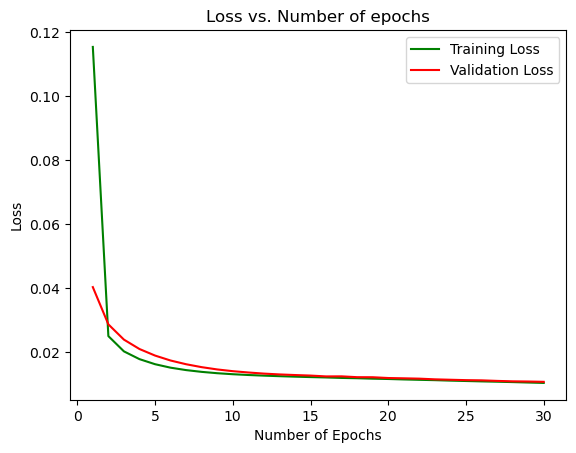

In [98]:
import matplotlib.pyplot as plt

# Assuming history_log contains the history object returned by model.fit()

# Retrieve training and validation loss from history object
loss = history_log.history['loss']
val_loss = history_log.history['val_loss']

# Plotting the training and validation loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss vs. Number of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


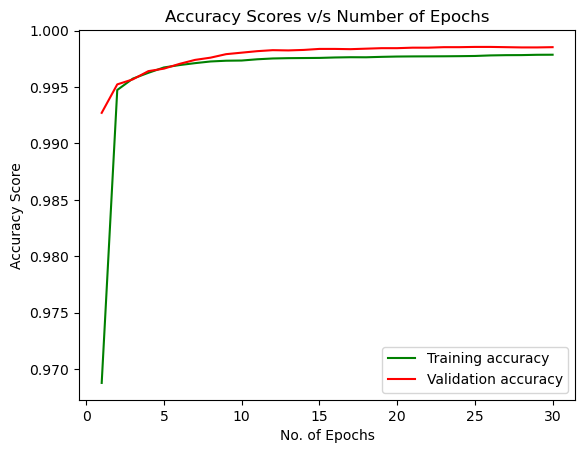

In [99]:
accuracy = history_log.history['accuracy']
val_accuracy = history_log.history['val_accuracy']
plt.plot(epochs, accuracy , 'g', label = 'Training accuracy')
plt.plot(epochs, val_accuracy , 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [100]:
! wget "https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/dns.csv"
! wget "https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/ldap.csv"
! wget "https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/mssql.csv"
! wget "https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/netBIOS.csv"
! wget "https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/ntp.csv"
! wget "https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/snmp.csv"
! wget "https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/ssdp.csv"
! wget "https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/syn.csv"
! wget "https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/tftp.csv"
! wget "https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/udp.csv"
! wget "https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/udplag.csv"


--2024-06-26 14:08:17--  https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/dns.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18895635 (18M) [text/plain]
Saving to: ‘dns.csv.3’

dns.csv.3           100%[===================>]  18.02M  5.59MB/s    in 3.3s    

2024-06-26 14:08:21 (5.38 MB/s) - ‘dns.csv.3’ saved [18895635/18895635]

--2024-06-26 14:08:21--  https://raw.githubusercontent.com/neonithinar/Intrusion-detection-cicDDOS-dataset/main/datasets/ldap.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting re

In [101]:
dfs = []
files = ['dns.csv', 'ldap.csv', 'mssql.csv', 'netBIOS.csv', 'ntp.csv', 'snmp.csv', 'ssdp.csv', 'syn.csv', 'tftp.csv', 'udp.csv', 'udplag.csv']
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)


/tmp/ipykernel_11165/3642864736.py:4: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/tmp/ipykernel_11165/3642864736.py:4: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/tmp/ipykernel_11165/3642864736.py:4: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/tmp/ipykernel_11165/3642864736.py:4: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/tmp/ipykernel_11165/3642864736.py:4: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/tmp/ipykernel_11165/3642864736.py:4: DtypeWarning: Columns (86) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
/tmp/ipykernel_1

In [102]:
ddos_data_test = pd.concat(dfs)

In [103]:
ddos_data_test = ddos_data_test[train_columns]
print(ddos_data_test.shape)

(440000, 85)


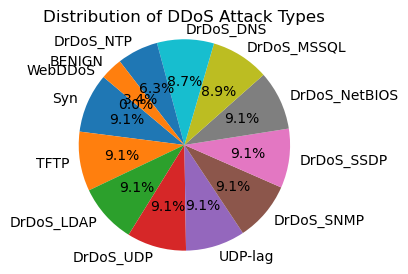

In [104]:
visualize_labels_distribution(ddos_data_test)

In [105]:
normalize_timestamp(ddos_data_test)

In [106]:
dropping_const_and_red_columns(ddos_data_test)


In [107]:
label_encoder=LabelEncoder()
def Encode_Label_Column_1(ddos_data):
    label_mapping = {'BENIGN': 0, 'Syn': 1, 'TFTP': 1, 'DrDoS_LDAP': 1, 'DrDoS_UDP': 1, 'UDP-lag': 1,
                 'DrDoS_SNMP': 1, 'DrDoS_SSDP': 1, 'DrDoS_NetBIOS': 1, 'DrDoS_MSSQL': 1,
                 'DrDoS_DNS': 1, 'DrDoS_NTP': 1, 'WebDDoS': 1}
    #ddos_data[' Label']=label_encoder.fit_transform(ddos_data[' Label'])
    ddos_data[' Label'] = ddos_data[' Label'].map(label_mapping)

In [108]:
Encode_Label_Column_1(ddos_data_test)
encoding_ip_srv_dst(ddos_data_test)
setting_time_as_an_index(ddos_data_test)

In [109]:
ddos_data_test=ddos_data_test[final_columns]

In [110]:
non_binary_columns = ddos_data_test.columns[ddos_data_test.nunique() > 2]
scaled_data_test = scale_num_features(ddos_data_test.copy(), non_binary_columns=non_binary_columns)

testX=[]
testY=[]
n_future=1
n_past=10
for i in range(n_past,len(ddos_data_test)-n_future+1):
    testX.append(ddos_data_test.iloc[i-n_past:i, :])
    testY.append(ddos_data_test.iloc[i+n_future-1:i+n_future][' Label'])
testX, testY=np.array(testX), np.array(testY)

In [111]:
non_binary_columns


Index([' Source IP', ' Source Port', ' Destination IP', ' Destination Port',
       ' Protocol', 'Total Length of Fwd Packets', ' Fwd Packet Length Min',
       ' Bwd Packet Length Min', ' Flow IAT Min', 'Bwd IAT Total',
       ' Bwd IAT Mean', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Packet Length Mean',
       ' Down/Up Ratio', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' act_data_pkt_fwd', ' min_seg_size_forward', ' Active Std',
       ' Active Min', ' Idle Std', ' Idle Min'],
      dtype='object')

In [1]:
# Run predictions on the test set
y_pred = model.predict(testX)

# If your model is for binary classification with a sigmoid activation
# You can threshold the predictions to get binary results
binary_predictions = (y_pred > 0.5).astype(int)

NameError: name 'model' is not defined

In [ ]:
accuracy = accuracy_score(testY, binary_predictions)
precision = precision_score(testY, binary_predictions)
recall = recall_score(testY, binary_predictions)
f1 = f1_score(testY, binary_predictions)


print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')